# **비지도학습(Unsupervised) 알고리즘:** 군집분석

[![Open in Colab](http://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/thekimk/All-About-Machine-Learning/blob/main/Lecture3-4_MachineLearning_Unsupervised_KK.ipynb)

---

<center><img src='Image/Expert/Advanced_Algorithms_Unsupervised.png' width='900'></center>

<!-- (https://thaddeus-segura.com/intro_to_ml/) -->

---

**0) 실제 데이터분석 접근 방법:** `편향과 분산 모두 최소화`하기 위해 `반복적`으로 업데이트

<center><img src='Image/Expert/Bias_Variance4.png' width='400'></center>

> **"`Train` 데이터의 `Bias가 적절(낮게)`한지 확인 후, `Test 데이터`에 적용하여 `Variance가 적절(낮게)하도록 반복적 업데이트`"**
>
> - Train의 Bias가 높다면,  `빅데이터(Row & Column)` 또는 `알고리즘 복잡하게` 또는 `최적화`를 통해 해결
>
> - Test의 Variance가 높다면, `빅데이터(Row) & 스몰데이터(Column)` 또는 `알고리즘 덜 복잡하게` 또는 `최적화`를 통해 해결
>
> <center><img src='Image/Expert/Bias_Variance_Reduce.png' width='600'></center>
>
> - **딥러닝(인공지능 알고리즘):** 딥러닝은 `엄청나게 복잡한 모델`이며 `Bias-variance Trade-off를 피할 수 없음`
>
> - `스몰데이터`의 딥러닝은 `과대적합`되어 `High Variance`가 우려되기에, `딥러닝`으로 성능을 내기 위해선 `빅데이터`가 반드시 필요!
>
> - `빅데이터`를 통해 `Train과 Test의 패턴 차이 감소`되어 `Bias & Variance를 모두 감소시키기 유리`

---

| Clustering Algorithms | Association Rule Learning Algorithms | Dimensionality Reduction Algorithms | Ensemble Algorithms | Deep Learning Algorithms |
|------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------|
| <img src='Image/Expert/Clustering-Algorithms.png' width='150'> | <img src='Image/Expert/Assoication-Rule-Learning-Algorithms.png' width='150'> | <img src='Image/Expert/Dimensional-Reduction-Algorithms.png' width='150'> | <img src='Image/Expert/Ensemble-Algorithms.png' width='150'> | <img src='Image/Expert/Deep-Learning-Algorithms.png' width='150'> |
| k-Means | Apriori algorithm | Principal Component Analysis (PCA) | Boosting | Deep Boltzmann Machine (DBM) |
| k-Medians | Eclat algorithm | Principal Component Regression (PCR) | Bootstrapped Aggregation (Bagging) | Deep Belief Networks (DBN) |
| Expectation Maximisation (EM) | - | Partial Least Squares Regression (PLSR) | AdaBoost | Convolutional Neural Network (CNN) |
| Hierarchical Clustering | - | Sammon Mapping | Stacked Generalization (blending) | Stacked Auto-Encoders |
| - | - | Multidimensional Scaling (MDS) | Gradient Boosting Machines (GBM) | - |
| - | - | Projection Pursuit | Gradient Boosted Regression Trees (GBRT) | - |
| - | - | Linear Discriminant Analysis (LDA) | Random Forest | - |
| - | - | Mixture Discriminant Analysis (MDA) | - | - |
| - | - | Quadratic Discriminant Analysis (QDA) | - | - |
| - | - | Flexible Discriminant Analysis (FDA) | - | - |

---

**"`비지도학습(Unsupervised Learning)`은 `정답 레이블`이 없기 때문에, 주로 데이터를 `새롭게 표현`하여 원래 데이터보다 `쉽게 해석`하거나 `특성들을 추가적으로 파악`하는데 주로 사용"**
- **군집분석:** `비지도학습` 알고리즘 중 `군집화`를 위해 사용되는 가장 `기본(Baseline) 알고리즘`

> (비수학적) **"일상 속 문제들은 어떤 유형들이 있는지 파악하는 문제"**
> - 고객들의 정보를 통해 `성인인지 미성년자인지` `정답`을 찾는 문제가 `분류문제`
> - 고객들의 정보를 통해 `어떤 쇼핑 취향들`이 있는지 `성인 또는 미성년자 레이블`을 할당하며 `추론`하는 문제가 `군집문제` 
>> - 데이터가 `2차원`일 경우 `시각화`를 통해 눈으로도 `패턴, 군집, 관계`를 어림짐작 가능
>> - 데이터가 `3차원 이상`일 경우 시각화로 패턴, 군집, 관계 `파악 어려움`

> (수학적) **"특정 출력(종속변수)/입력(독립변수)의 구분이나 `관계 추론도 없고` 학습을 위한 `목표값도 없이`, 주어진 데이터를 `유사한 그룹으로 군집화(Clustering)` 하는 알고리즘"**
> - **분류문제:** 데이터 변수(Feature, Variable)들을 사용하여 `특정 분류값을 예측`
> - **군집문제:** 데이터 변수(Feature, Variable)들을 사용하여 `여러개의 레이블`을 할당하면서 `특정 군집값(Cluster)을 예측`

---

- **Target Algorithm:**

> **(1) `Partitional Clustering` vs `Hierarchical Clustering`**
>
> - **Partitional:** `전체 데이터`를 `Hard Clustering` 기준으로 한번에 `군집형성`하는 방식
> - **Hierarchical:** `각각의 데이터`에서 유사성 척도(Similarity Measure)에 의해 `가까운 데이터들을` `Tree 형태`의 `계층적 군집`으로 차근차근 `묶어나가는` 방식이며 Tree에서 `어느 수준을 기준`으로 하느냐에 따라 `군집이 달라짐`
>
> <center><img src='Image/Expert/Partitional_Hierarchical.png' width='600'>(https://quantdare.com/hierarchical-clustering/)</center>
>
> **(2) `Hierarchical Clustering`**
>
> - **Agglomerative(Bottom-up):** `개별 데이터`에서 `유사한 데이터끼리 묶어가는` 방식
> - **Divisive(Top-down):** `모든 데이터`를 하나의 군집이라 가정 후 `세부 군집으로 분리`하는 방식
>
> <center><img src='Image/Expert/AggloDivHierarClustering.png' width='600'>(https://quantdare.com/hierarchical-clustering/)</center>
>
> | **군집특성 분류** 	| **접근방법** 	| **측정기준** 	| **알고리즘** 	|
|:---:	|:---:	|:---:	|:---:	|
| **Hard Clustering** 	| **Partitional Clustering** 	| **Distance-based** 	| `K-Means` 	|
|  	|  	|  	| `K-Median` 	|
|  	|  	|  	| `K-Mode` 	|
|  	|  	|  	| `K-Medoid` 	|
|  	|  	|  	| Fuzzy Clustering 	|
|  	|  	|  	| PAM(Partitioning Around Medoids) 	|
|  	|  	|  	| CLARA(Clustering LARge Applications) 	|
|  	|  	|  	| CLARANS(Clustering Large Applications based on RANdomized Search) 	|
| **Soft Clustering** 	| **`Hierarchical Clustering`** 	| **Agglomerative<br>     (Bottom-up)** 	| Single Linkage(Graph-based) 	|
|  	|  	|  	| Complete Linkage(Graph-based) 	|
|  	|  	|  	| Average Linkage(Graph-based) 	|
|  	|  	|  	| Centroid Linkage(Distance-based) 	|
|  	|  	|  	| Ward Linkage(Distance-based) 	|
|  	|  	|  	| AGNES(AGglomerative NESting) 	|
|  	|  	| **Divisive<br>     (Top-down)** 	| DIANA(DIvisive ANAlysis) 	|
|  	|  	|  	| BIRCH(Balanced Iterative Reducint and Clustering Using Hierarchies) 	|
|  	|  	|  	| CURE(Clustering Using Representatives) 	|
|  	|  	|  	| Chameleon 	|
|  	| **`Density-based Clustering`** 	|  	| DBSCAN(Density Based   Spatial Clustering of Applications with Noise) 	|
|  	|  	|  	| OPTICS(Ordering Points To   Identify the Clustering Structure) 	|
|  	|  	|  	| DENCLUE(DENsity-based   CLUstEring) 	|
|  	|  	|  	| Density-peaks 	|
|  	|  	|  	| Robust-DB(Density Based) 	|
|  	| **Grid-based Clustering** 	|  	| STING(Statistical   Information Grid) 	|
|  	|  	|  	| WaveCluster 	|
|  	|  	|  	| CLIQUE(CLustering In QUEst) 	|
|  	| **Model-based Clustering** 	| **Distribution-based** 	| Gaussian Mixture Algorithm 	|
|  	|  	|  	| Expectation Maximization   Algorithm 	|
|  	|  	|  	| AutoClass(Mixture of Naïve   Bayes) 	|
|  	|  	|  	| Cobweb 	|
|  	|  	| **Network-based** 	| Kohonen Clustering 	|
|  	|  	|  	| SOM(Self-Organizing Map) 	|

## 계층적 군집화(Hierarchical Clustering, HC)

**1) 방향:** 유사도가 높은 또는 거리가 가까운 `데이터 그룹`을 `계층적으로 묶으면서` 군집 갯수 줄이는 방법

> **(1) 소형견 vs 소 vs 중형견:** `(푸들, 요크셔테리어)`, `(물소, 젖소, 황소)`, `(셰퍼드, 골든리트리버)`
>
> **(2) 개 vs 소:** `(푸들, 요크셔테리어, 셰퍼드, 골든리트리버)`, `(물소, 젖소, 황소)`
>
> **(3) 동물:** `(푸들, 요크셔테리어, 셰퍼드, 골든리트리버, 물소, 젖소, 황소)`

<center><img src='Image/Expert/Hierarchical_ExamplePlot.png' width='600'>(Come Svolgere Una Cluster Analysis (Software Past3))</center>

---

- **결과 표현 방식:** `Nested Clusters` vs `Dendrogram`

> - 데이터가 `2차원`인 경우 `Nested Clusters`를, `일반적`으로는 `Dendrogram` 사용

<center><img src='Image/Expert/Hierarchical_ResultExample.png' width='500'></center>

---

- **추정 과정:** 

> - 데이터들의 `유사성(Distance, Dissimilarity)을 추정` 후 `결합과정(Agglomeration)`을 거쳐 `Dendrogram` 출력
> - 처음에 모든 군집은 `하나의 데이터`를 가지기에 `데이터 갯수만큼 군집 존재`
> - 최종적으론 군집이 합처져 군집화되면서 `하나의 군집`만 존재

<center><img src='Image/Expert/Hierarchical_Process.png' width='600'>(https://tyami.github.io/machine%20learning/hierarchical-clustering/)</center>

---

**2) 알고리즘 함수세팅:** `유사성 추정 방식`과 `결합 과정`에 따라 여러가지 방식 존재

> **(1) 유사성 추정 방식(Distance Matrix):** `두 데이터 간의 차이`를 `어떻게 표현`할 것인가
>
> - **데이터 특성에 따라**:
>
> | **대분류** 	| **소분류** 	| **의미/예시** 	|
|:---:	|:---:	|:---:	|
| **질적변수(Qualitative Variable)** 	| **-** 	| 내부 값이 특정 범주(Category)로 분류된 변수(색상,성별,종교) 	|
|  	| **명목형 변수(Nominal Variable)** 	| 값이 순위가 존재하지 않는 경우(혈액형) 	|
|  	| **순위형 변수(Ordinal Variable)** 	| 값이 순위가 존재하는 경우(성적) 	|
| **양적변수(Quantitative Variable)** 	| **-** 	| 내부 값이 다양한 숫자 분포로 구성된 변수(키,몸무게,소득) 	|
|  	| **이산형 변수(Discrete Variable)** 	| 값이 셀수 있는 경우(정수) 	|
|  	| **연속형 변수(Continuous Variable)** 	| 값이 셀수 없는 경우(실수) 	|
>
> - **변수 종류에 따른 측정 방식:**
>
> | **변수 종류** 	| **측정** 	| **설명** 	|
|:---:	|:---:	|:---	|
| **Continuous Variable** 	| **Manhattan Distance(Minkowski at Rank=1)** 	| 최단 루트 측정(변수들의 단위가 다르거나 상관성이 있으면 크게 변함) 	|
|  	| **Euclidean Distance(Minkowski at Rank=2)** 	| 최단 거리 측정(변수들의 단위가 다르거나 상관성이 있으면 크게 변함) 	|
|  	| **Standardized Distance** 	| 변수의 분산을 고려하여 표준화 측정 	|
|  	| **Mahalanobis Distance** 	| 변수의 표준화 및 변수들의 상관관계 측정 	|
|  	| **Weighted Euclidean Distance** 	| Euclidean & Standardized의 일반화 측정 	|
| **Continuous/Discrete Variable** 	| **Pearson's Correlation Coefficient** 	| 상관관계 측정 	|
| **Discrete(Binary)/Nominal Variable** 	| **Simple Matching Coefficient** 	| 수식 참고 	|
|  	| **Jaccard's Coefficient** 	| 수식 참고 	|
|  	| **Russell and Rao Coefficient** 	| 수식 참고 	|
| **Nominal Variable** 	| **Cosine Distance** 	| 문자 벡터들의 각도 측정 	|
|  	| **Levenshtein Metric** 	| 문자 벡터들에서 다른 단어로 변경시 필요한 편집수 측정 	|
|  	| **Tanimoto Coefficient(Expanded Jaccard's Coefficient)** 	| 문자 벡터 적용 Jaccard's Coefficient 	|
| **Ordinal Variable** 	| **Rank Correlation Coefficient** 	| 순위기반 상관관계 측정 	|
| **Continuous/Discrete/Nominal/Ordinal** 	| **Hamming Distance** 	| 같은 길이의 데이터에 같은 위치에 있는 값들의 비교 측정 	|
>
> - 실제 `데이터 값들`마다 유사성을 추정하여 `행렬(Matrix)`로 표현
> - 특정 값의 쌍에서 추정된 유사성 거리는 행렬에서 2군데에 `대칭적으로 표현`
> - 값 자체의 유사성은 계산하지 않고 `0`으로 표현
>
> <center><img src='Image/Expert/Hierarchical_DistanceMatrix.png' width='700'></center>
> <center><img src='Image/Expert/Hierarchical_DistanceMatrixExample.png' width='500'></center>

> **(2) 결합 방식(Agglomeration):** `두 데이터 간의 차이`를 `어떻게 표현`할 것인가
>
> - `Agglomerative`는 `각 데이터`로부터 군집을 만들며 `키워가는 방식`
> - `Divisive`는 반대로 `군집을 점차 나누면서` 세부 군집으로 `줄여가는 방식`
>
> <center><img src='Image/Expert/AggloDivHierarClustering.png' width='600'>(https://quantdare.com/hierarchical-clustering/)</center>
>
> | **군집특성 분류** 	| **접근방법** 	| **측정기준** 	| **알고리즘** 	|
|:---:	|:---:	|:---:	|:---:	|
| **Soft Clustering** 	| **`Hierarchical Clustering`** 	| **Agglomerative<br>     (Bottom-up)** 	| Single Linkage(Graph-based) 	|
|  	|  	|  	| Complete Linkage(Graph-based) 	|
|  	|  	|  	| Average Linkage(Graph-based) 	|
|  	|  	|  	| Centroid Linkage(Distance-based) 	|
|  	|  	|  	| Ward Linkage(Distance-based) 	|
|  	|  	|  	| AGNES(AGglomerative NESting) 	|
|  	|  	| **Divisive<br>     (Top-down)** 	| DIANA(DIvisive ANAlysis) 	|
|  	|  	|  	| BIRCH(Balanced Iterative Reducint and Clustering Using Hierarchies) 	|
|  	|  	|  	| CURE(Clustering Using Representatives) 	|
|  	|  	|  	| Chameleon 	|
>
> <center><img src='Image/Expert/Hierarchical_DirectionType.png' width='500'>(https://tyami.github.io/machine%20learning/hierarchical-clustering/)</center>

---

**3) 비용함수:** `군집과 군집간의 거리`를 계산하며 `Linkage`라고 함

| **Linkage 방향** 	| **Linkage 종류** 	| **설명** 	| **특징** 	|
|:---:	|:---:	|:---	|:---	|
| **비계층적 방법** 	| - 	| 모든 군집화 알고리즘에 사용가능 <br>계산량 많은   단점 	|  	|
|  	| `Centroid` 	| 서로 다른 군집의 `모든 데이터의 평균 간 거리` 	| 일부 Noise / Outlier에 덜 민감하나 <br>다소 성능이 떨어짐 	|
|  	| `Single` 	| 서로 다른 군집의 `모든 데이터 간 거리 중 최소값` 	| 일부 Noise / Outlier에 민감하게 반응 	|
|  	| `Complete` 	| 서로 다른 군집의 `모든 데이터 간 거리 중 최대값` 	| 일부 Noise / Outlier에 민감하게 반응하며 <br>큰 클러스터 생성에 약함  	|
|  	| `Average` 	| 서로 다른 군집의 `모든 데이터 간 거리의 평균` 	| 일부 Noise / Outlier에 덜 민감하나 <br>편향성 존재 	|
| **계층적 방법** 	| - 	| 계층적 군집화 알고리즘에만 사용가능 <br>계산량 적어 효율적 	|  	|
|  	| `Median` 	| Centroid의 변형으로 모든 데이터 아닌 <br>`기존 군집 중심점 평균` 사용 	|  	|
|  	| `Weighted` 	| Centroid의 변형으로 모든 군집들 내부와 <br>`외부 데이터와의 거리 평균` 사용 	|  	|
|  	| `Ward` 	| Weighted의 변형으로 군집화 증가시 <br>`내부 분산을 가장 작게 증가시키는 군집` 	| 일반적으로 많이 사용하나 <br>편향성 존재 	|

<br>
<center><img src='Image/Expert/Hierarchical_Linkage.jpg' width='600'>(https://livebook.manning.com/book/machine-learning-for-mortals-mere-and-otherwise)</center>

---

**4) 추정과정 예시:** `Agglomerative Hierarchical Clustering`

> **(0) 데이터 기반 Distance Matrix:**
>
> - 5개의 변수와 각 데이터간 거리는 왼쪽과 같음
>
> <center><img src='Image/Expert/Hierarchical_Estimation1.png' width='800'></center>
>
> **(1) 군집화:**
>
> - `Single Linkage`기준 `A & B`, `D & E` 거리가 가장 짧으니 군집화
> - Dendrogram의 높이는 `군집간 거리`
>
> <center><img src='Image/Expert/Hierarchical_Estimation2.png' width='800'></center>
>
> **(2) Distance Matrix 업데이트:**
>
> - 군집화 된 변수와 그렇지 않은 변수들과의 거리 기반 `Distance Matrix 업데이트`
>
> <center><img src='Image/Expert/Hierarchical_Estimation3.png' width='800'></center>
>
> **(3) 군집화:**
>
> - `Single Linkage`기준 `AB & C` 거리가 가장 짧으니 군집화
>
> <center><img src='Image/Expert/Hierarchical_Estimation4.png' width='800'></center>
>
> **(4) Distance Matrix 업데이트 및 반복:**
>
> <center><img src='Image/Expert/Hierarchical_Estimation5.png' width='800'></center>
>
> **(5) 최종 군집 완성:**
>
> - `모든 데이터`가 `하나의 군집`으로 합쳐짐
>
> <center><img src='Image/Expert/Hierarchical_Estimation6.png' width='500'>(https://tyami.github.io/machine%20learning/hierarchical-clustering/)</center>

---

**5) 이슈 및 방향:** `비용함수`에 따라 군집화 `결과 다름`

<center><img src='Image/Expert/Hierarchical_Issue1.png' width='700'></center>
<br>
<center><img src='Image/Expert/Hierarchical_Issue2.png' width='700'>(Kotulska Unold BMC2013)</center>

- `Hierarchical Clustering`에서는 K-means와 달리 `군집의 갯수`를 `사전에 설정하지 않음`
- `최종 Dendrogram`에 가상의 선을 그어 `군집의 갯수` 결정
 
<center><img src='Image/Expert/Hierarchical_ClusterNumber.png' width='500'></center>

- 각 군집의 갯수에 따른 `Metric`을 통해 `최종 갯수` 결정
> - `Dunn Index`
> - `Silhouette Index`
> - `ARI(Adjusted Rand Index)`
> - `NMI(Normalized Mutual Information)`
> - `AMI(Adjusted Mutual Information)`

---

> **(1) Dunn 지표(Dunn Index):** `군집 내 데이터 간 거리 최대값` 대비 `군집간 거리 최소값`의 비율
>
> - `군집 간 거리는 멀수록` & `군집 내 분산은 작을수록` 좋은 군집화이며 Dunn Index는 `증가`
>
>$$
DI(C)=\cfrac { \min _{ i\neq j }{ \{ { d }_{ c }({ C }_{ i },{ C }_{ j })\}  }  }{ \max _{ 1\le l\le k }{ \{ \triangle { C }_{ l }\}  }  }
$$
> <center><img src='Image/Expert/Clustering_DunnIndex.png' width='600'>(https://tyami.github.io/machine%20learning/clustering/)</center>

> **(2) 실루엣 지표(Silhouette Index):** `군집 내 데이터 간 거리 평균`과 가장 가까운 `군집 내 데이터 간 거리 평균`의 차이
>
>$$
S(i)=\frac { b(i)-a(i) }{ \max { \{ a(i),b(i)\}  }  }
$$
>
> **군집 내 응집도(Cohesion)**
> - **$a(i)$:** `i`번째 `군집 내` 속한 `데이터들과의 거리 평균`
>
> **군집 간 분리도(Separation)**
> - **$b(i)$:** `i`번째 군집과 `가장 가까운 군집`에 속한 `데이터들과의 거리 평균`
>
> <center><img src='Image/Expert/Clustering_Silhouette.png' width='600'>(https://tyami.github.io/machine%20learning/clustering/)</center>
>
> - 보통 `실루엣 지표`가 `0.5`보다 크면 군집 결과가 `타당한 것으로 평가`
>
> <center><img src='Image/Expert/Clustering_Silhouette_BestWorst.png' width='400'>(https://tyami.github.io/machine%20learning/clustering/)</center>
>
> - 오히려 평가보다 `군집 갯수`를 결정하는데 많이 사용
> - `밀집된 클러스터`에선 성능이 좋으나 `모양이 복잡할 때`는 평가 성능 `좋지 않음`

> **(3) Others:** 클러스터 `레이블 정답`을 아는 경우 `군집성능` 평가
>
> - **ARI(Adjusted Rand Index):** 얼마나 `많은 클러스터들`이 `정답과 유사한지` 측정
> ```python
>from sklearn.metrics import adjusted_rand_score
>```
>
> - **NMI(Normalized Mutual Information):** 상관관계 한계를 대체하기 위해 `실제와 예측 클러스터` 생성을 위한 `정보량 분포`의 `유사성/의존도` 측정
> ```python
>from sklearn.metrics import normalized_mutual_info_score
>```
>
> - **AMI(Adjusted Mutual Information):** 정보량과 상관없이 `클러스터 수`가 많을 때 `NMI`가 높아지는 `한계를 보완`
> ```python
>from sklearn.metrics import adjusted_mutual_info_score
>```

> **(4) 현실 지표:** 
> - `데이터에 잡음/변화`를 주었을 때의 `결과 변동성` 고려
> - 알고리즘 `매개변수에 변화`를 주었을 때의 `결과 변동성` 고려
> - 여러가지 변화에도 `결과가 일정하면(Robust)` `신뢰`할만한 모델링

---

**4) 사용방법:**

> ```python
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
> ```

> ```python
># Linkage 계산 및 Dendrogram 시각화
X_tr_link = linkage(X_train, method='ward')
dendrogram(X_tr_link, orientation='top', 
           distance_sort='ascending', show_leaf_counts=True)
plt.show()
>
># Cluster 추정
model_aggclust = AgglomerativeClustering(n_clusters=5, 
                                         affinity='euclidean', 
                                         linkage='ward')
Y_trpred = model_aggclust.fit_predict(X_train)
Y_tepred = model_aggclust.fit_predict(X_test)
> ```

## 밀도기반 군집화(Density-Based Clustering, DBC)

**1) 방향:** 

| **접근** 	| **가정** 	| **특징** 	|
|:---:	|:---	|:---	|
| **Distance-based** 	| 동일 군집에 속하는 데이터들은 `어떠한 중심을 기준으로 분포`될 것 	| `원형태` 군집 	|
| **Density-based** 	| 동일 군집에 속하는 데이터들은 `서로 근접하게 분포`될 것 	| `불특정형태` 군집 	|

>**"빅데이터에서 군집화는 3가지 조건을 충족할 수록 좋은 알고리즘"**
> - 대용량 데이터라도 `파라미터 설정`을 위한 `최소한의 도메인 지식`이 수반되어야 함
> - 데이터의 형태가 구형, 타원형, 선형 등 `다양한 형태`이더라도 `군집화` 성능에 효과가 있어야
> - 스몰데이터 뿐만 아니라 빅데이터에서도 `효율적 군집화` 가능해야

<center><img src='Image/Expert/Clustering_Comparison.jpg' width='900'>(https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68)
</center>

---

**2) 알고리즘 함수세팅:** `단순`하지만 `고성능 및 고효율` 밀도 기반 군집화 알고리즘 `DBSCAN`

<center><img src='Image/Expert/KMeas_DBSCAN.png' width='600'>(https://rfriend.tistory.com/587)
</center>

> - `K-means` 또는 `Hierarchical`의 경우 거리를 이용하여 군집화를 하는 반면, `밀도가 높은 부분`을 군집화 하는 방법
> - K-means와 달리 `클러스터의 갯수`를 미리 `지정할 필요 없음`
> - 밀도에 따라 군집화를 확장하기 때문에 다양한 `기하학적 구조`의 군집화에도 효과
> - `K-means` 또는 `Hierarchical` 대비 다소 느리지만 비교적 `큰 데이터셋`에도 쉽게 적용 가능
> - `특정 데이터`가 군집에 속하는 경우 해당 `클러스터 내 다른 많은 요소들과 가까워야` 한다는 아이디어
> - `컴퓨팅 알고리즘` 기반 제안된 방법론이라 `특별한 수식 미존재`
> - **용어 정리:**
>> - **R(Radius of Neighborhood):** `Radius`는 특정 값을 기준으로 `반경(밀도)`을 지정
>> - **M(Min Number of Neighbors):** `핵심요소 지정`을 위해, 핵심 주변의 `요소 갯수` 지정, 최소 3이상 및 기본적으로 변수의 수 정도
> - 데이터 각각을 `핵심점`, `경계점`, 그리고 `이상치`로 구분
>> - **핵심점(Core Point):** 특정 데이터가 `R` 반경 이내에 `M`개의 데이터가 있는 경우 `Core Point`
>> - **군집(Cluster):** `Core Point + 주변 M개의 데이터`
>> - **경계점(Border Point):** 군집 내에서 Core Point가 아닌 데이터를 `Border Point`
>> - **이상치(Outlier Point):** 군집에 속하지 않는 데이터를 `Outlier Point`
>
> <center><img src='Image/Expert/DBSCAN_Words.png' width='300'></center>
> 
> **(1) 각 데이터 별로 `핵심점들` 탐색**
>
> <center><img src='Image/Expert/DBSCAN_Process1.png' width='300'></center>
> <center><img src='Image/Expert/DBSCAN_Process2.png' width='300'></center>
>
> **(2) `핵심점들 거리`가 `R보다 작을 경우` 같은 클러스터로 `군집화`**
>
> <center><img src='Image/Expert/DBSCAN_Process3.png' width='300'></center>
>
> **(3) `핵심` 안에 속하지 못한 `이상치` 탐색**
>
> <center><img src='Image/Expert/DBSCAN_Process4.png' width='300'>(https://bcho.tistory.com/)</center>

---

- **추정과정 및 정리:**

<center><img src='Image/Expert/DBSCAN_Simulation.gif' width='600'></center>

| **장점** 	| **단점** 	|
|:---:	|:---:	|
| `DBSCAN`은 이상치에 민감하지 않고 `Robust`함 	| 부분적으로 비슷한 밀도를 가진 데이터의 경우 효과 떨어짐 	|
| 이상치를 별도 추정 가능 	| 터이터 처리 순서가 매번 달라 결과가 달라짐 	|
| 저밀도 군집에서도 고밀도 군집 분리 유용 	| 고차원의 데이터로 갈수록 `Radius` 지정이 어려움 	|
| 다양한 형태의 군집도   추출 가능 	| 데이터가 증가하면 `계산 시간`이 훨씬 증가 	|
| 군집 수를 미리 지정할   필요 없음 	| `적합한 파라미터` 설정 어려움 	|
| 비교적 `큰 데이터셋`에도 쉽게 적용 	|  	|

---

**3) 이슈 및 방향:** `Radius`에 따라 군집화 `결과 다름`

<center><img src='Image/Expert/DBSCAN_Issue.png' width='700'></center>

- `다양한 밀도`를 가지는 데이터에서는 `성능이 떨어지며`, 고차원에서 적절한 `Radius` 추정이 어려움
- 적절한 Radius 추정을 위해 `KNN의 Distance Graph`를 활용하여 변곡점으로 `적절한 Raduis 선정`
- `M Hyperparameter` 입력 필요가 없는 `Hierarchical DBSCAN(HDBSCAN)` 등장

---

**4) 사용방법:**

> ```python
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
> ```

> ```python
> # 학습 및 예측
model_dbscan = DBSCAN(eps=0.5, min_samples=2)
Y_tepred = model_dbscan.fit_predict(X_test)
> ```

# **비지도학습(Unsupervised) 알고리즘:** 차원변환

---

<center><img src='Image/Expert/Advanced_Algorithms_Unsupervised.png' width='900'></center>

<!-- (https://thaddeus-segura.com/intro_to_ml/) -->

---

| Clustering Algorithms | Association Rule Learning Algorithms | Dimensionality Reduction Algorithms | Ensemble Algorithms | Deep Learning Algorithms |
|------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------|
| <img src='Image/Expert/Clustering-Algorithms.png' width='150'> | <img src='Image/Expert/Assoication-Rule-Learning-Algorithms.png' width='150'> | <img src='Image/Expert/Dimensional-Reduction-Algorithms.png' width='150'> | <img src='Image/Expert/Ensemble-Algorithms.png' width='150'> | <img src='Image/Expert/Deep-Learning-Algorithms.png' width='150'> |
| k-Means | Apriori algorithm | Principal Component Analysis (PCA) | Boosting | Deep Boltzmann Machine (DBM) |
| k-Medians | Eclat algorithm | Principal Component Regression (PCR) | Bootstrapped Aggregation (Bagging) | Deep Belief Networks (DBN) |
| Expectation Maximisation (EM) | - | Partial Least Squares Regression (PLSR) | AdaBoost | Convolutional Neural Network (CNN) |
| Hierarchical Clustering | - | Sammon Mapping | Stacked Generalization (blending) | Stacked Auto-Encoders |
| - | - | Multidimensional Scaling (MDS) | Gradient Boosting Machines (GBM) | - |
| - | - | Projection Pursuit | Gradient Boosted Regression Trees (GBRT) | - |
| - | - | Linear Discriminant Analysis (LDA) | Random Forest | - |
| - | - | Mixture Discriminant Analysis (MDA) | - | - |
| - | - | Quadratic Discriminant Analysis (QDA) | - | - |
| - | - | Flexible Discriminant Analysis (FDA) | - | - |

---

**"`비지도학습(Unsupervised Learning)`은 `정답 레이블`이 없기 때문에, 주로 데이터를 `새롭게 표현`하여 원래 데이터보다 `쉽게 해석`하거나 `특성들을 추가적으로 파악`하는데 주로 사용"**

- **차원변환:** `비지도학습` 알고리즘 중 `다차원 특성파악`을 위해 사용되는 가장 `기본(Baseline) 알고리즘`

> (비수학적) **"일상 속 문제의 다양한 풀이법들의 우선순위를 파악하는 문제"**
> - 유사한 고객 정보를 가진 사람들의 `공통된 쇼핑 취향`을 파악하면서 `그룹(레이블)`으로 `추론`하는 문제가 `군집문제` 
> - 다양한 고객 정보들에서 `신규 쇼핑 취향`과 같은 추가적인 특성을 파악하기 위해 고객 정보들을 `차원변환`하여 문제를 다각도로 살펴보는 것

> (수학적) **"특정 출력(종속변수)/입력(독립변수)의 구분이나 `관계 추론도 없고` 학습을 위한 `목표값도 없이`, 주어진 데이터의 `추가적인 특성확인`을 위해 `다른 차원으로 변환(Reduction)` 하는 알고리즘"**
> - **군집문제:** 데이터에서 `유사한 값`들을 가진 `군집(Cluster)을 예측`하며 `레이블`을 할당
> - **차원변환:** 데이터를 다각도로 살펴보기 위해 `다른(차원) 관점`으로 `추가적인 변수를 예측`하며 특성 확인
>
> <center><img src='Image/Advanced/Unsupervised_Clustering_Reduction.png' width='900'></center>

> - **How?**
>
> **(1) 변수 선택(Feature/Variable Selection):** `특정 변수`가 `다른 변수들로 생성`될 수 있는 경우, 특정 변수의 `종속성이 강하다`고 하고 간단히 `제거를 통해 중요 변수들만 구성`하는 차원 축소
>> - **장점:** `남은 변수들`을 통해 `중요도`와 `해석`이 용이
>> - **단점:** `변수들` 간의 `종속성/상관성`을 명확하게 고려하기 `어려움`
>> - `Ridge`, `Lasso`, `VIF(Variance Inflation Factor)` 등
>
> **(2) 변수 추출(Feature/Variable Extraction):** 변수들 간의 `상관관계`를 고려하여 `새로운 중요 변수`를 생성하는 차원축소
>> - **장점:** `변수들` 간의 `상관성`을 고려하기 용이하고 `변수들`의 갯수를 `많이 줄일 수` 있음
>> - **단점:** `새롭게 추출된` 변수들의 `의미나 해석`이 `어려움`
>> - `PCA(Principal Component Analysis)`, `FA(Factor Analysis)` 등

---

- **종류:** 차원변환문제 해결 알고리즘은 다양하고, 데이터 `특성/구조/목적`에 맞는 `적절한 선택` 필요

> - **(Linear) Projection:** `선형`기준으로 데이터를 근사하여 `직관적`으로 차원을 축소
>
> - **(Non-linear) Manifold Learning:** 직관적으로 파악이 어려운 데이터의 `비선형적 관계`를 반영하여 차원을 축소
>
> | **접근방법** 	| **알고리즘** 	|
|:---:	|:---	|
| **(Linear) Projection** 	| Eigen Value Decomposition 	|
|  	| Singular Value Decomposition 	|
|  	| Truncated SVD 	|
|  	| Principal Component Analysis 	|
|  	| Factor Analysis 	|
|  	| Linear Discriminant Analysis 	|
|  	| Quadratic Discriminant Analysis 	|
| **(Non-linear) Manifold Learning** 	| Kernel Principal Component Analysis 	|
|  	| Non-Negative Matrix Factorization 	|
|  	| Locally Linear Embedding (LLE) 	|
|  	| Isomap 	|
|  	| Multi Dimensional Scaling 	|
|  	| Spectral Embedding 	|
|  	| t-distributed Stochastic Neighbor Embedding (t-SNE) 	|
|  	| Autoencoders 	|
|  	| Self Organizaing Map (SOP) 	|

---

- **Target Algorithm:**
> - `Eigen Value Decomposition`
> - `Singular Value Decomposition`
> - `Truncated SVD`
> - `Principal Component Analysis`
> - Principal Component Regression
> - `Factor Analysis`
> - `Linear Discriminant Analysis`
> - `Quadratic Discriminant Analysis`
> - Mixture Discriminant Analysis
> - `Non-Negative Matrix Factorization`
> - Locally Linear Embedding
> - t-distributed Stochastic Neighbor Embedding


## 요인 분석(Factor Analysis, FA)

**0) 배경:** `주성분분석?`, `요인분석?` 어떤 분석에 활용?

> **(1)** 변수들 `내부에 존재하는 구조`를 파악하여 정보를 요약하거나 `중요도가 낮은 변수를 제거`하려는 경우
>
> **(2)** 변수들에 내재하는 `상관관계, 연관성`을 이용해 `소수의 주성분 또는 요인`으로 차원을 축소함으로써 데이터의 `이해도 및 관리효율 높임`
> - 사람은 1/2차원까지는 직관적 이해가 가능하지만 3차원 이상은 어려움
> - 만약 변수가 10개(10차원) 있는데 2개의 차원으로 요약 표현해도 변수가 가진 변동의 80~90%를 설명할 수 있다면 굳이 10차원의 데이터가 필요한가?
>
> **(3)** 상관성이 너무 높은 변수들을 축소된 `소수의 주성분 또는 요인`으로 추출하여 예측/분류 모델링을 위한 다른 알고리즘의 `독립변수들로 사용하여` 성능을 높임
> - 데이터의 모델링 시 입력 변수들의 상관관계가 높은 `다중공선성`이 존재할 경우, 모델링 성능도 떨어지고 특히 `해석에 문제 발생`
> - 특히 다중공선성이 있는 데이터로 `결정트리 생성 시` 하나의 변수가 구분되어 버리면 `그 변수와 상관성이 있는 변수`들은 `중요하지 않은 변수`로 간주되거나 모델링에 포함되지 않음
> - 요인분석 후 `새로운 잠재변수`를 추가하여 분석 수행시 `다중공선성 문제 해결` 가능
>
> <center><img src='Image/Expert/FactorAnalysis_Application.png' width='600'></center>
>
> **(4)** 레이블이 없는 군집분석에도 `연산속도 개선`에 기여하며 `군집 레이블링`도 가능
> - 요인들의 군집분석을 통해 세부군집 레이블링 가능
>
> **(5)** `기계장비`에서 발생하는 다수의 데이터를 주성분/요인 분석을 통해 `시계열의 분포`나 `추세 변화`에 반영하여 `기계의 고장징후` 등을 사전에 파악하는데 활용
>
> **(6)** `데이터 전처리 변환` 방법으로도 사용되며, 주성분/요인 분석 자체를 `해석에도 활용`

---

**1) 요인분석 방향:** 데이터 변수들의 `잠재변수`를 찾아 `변수의 수를 줄이는 것`

> - 통계학자 Spearman이 학생들의 시험성적 상관관계를 보다가 연관성 있는 변수를 묶는 내재 속성 추출 고민에서 유래
> - `여러개의 변수들`로 구성된 데이터에서 상관관계를 기초로 변수들을 설명할 수 있는 새로운 공통 `잠재 요인` 발견 또는 `데이터 구조 확인`이 목적인 탐색적 데이터 분석 방법론
> - 잠재요인과 무관하게 FA에서는 `고유요인(e)`이 존재하며 각 변수들 자체와 관련있는 고유분산이기 때문에 상관행렬을 그대로 사용하지 않고 `수정된 상관행렬(Adjusted Correlation Matrix)` 사용
> - PCA와 `깊은 관계`가 있지만 목적이 다르고 일반적으로 PCA $\neq$ FA

<center><img src='Image/Expert/PCA_FA_Comparison2D.jpg' width='600'>(https://livebook.manning.com/book/r-in-action-second-edition/chapter-14/7)</center>
<!-- > <center><img src='Image/Expert/PCA_FA_Comparison.png' width='900'>(https://community.jmp.com/t5/JMP-Blog/Principal-components-or-factor-analysis/ba-p/38347)</center> -->

- **요인(Factor):** 변수들의 `연관성`을 설명하는 `잠재 변수`

> - `요인의 갯수`는 변수의 수만큼 가능
> - 모든 요인은 변수들의 `공통 분산을 설명`
> - 분산의 양이 가장 적은 요인은 제거
> - `잠재변수`, `관측되지 않은 변수`, `가상 변수` 라고도 함
>
> <center><img src='Image/Expert/FactorAnalysis_Factor.png' width='550'></center>
>
> <center><img src='Image/Expert/FactorAnalysis_FactorWeight.png' width='800'></center>

- **요인 추출 및 레이블링?:**

> <center><img src='Image/Expert/FactorAnalysis_FactorLoading.png' width='500'></center>

---

**2) 알고리즘 함수세팅:**

> **(0) 데이터 수집:**
>
> - 각 변수의 값들은 `정규분포`를 따르고 `순위나 비율`로 표현되는 `동일 분산 범위`의 값
> - 일반적으로 `변수의 수` 대비 `10배 이상의 샘플`을 권장

> **(1) 요인분석 가능성 파악(Factorability):**
>
> - **Bartlett Test:** 변수들의 `상관관계`를 추정하여 `단위행렬`보다 `상관성이 높은지` 여부 검정
>> - 검정을 위해 `카이제곱분포`를 이용한 통계량을 추정하며 `유의할 경우` 요인분석 실행
> - **Kalser-Meyer-Olkln(KMO) Test:** 변수들의 `편상관관계`가 얼마나 작은지 여부 검정
>> - **편상관관계:** 두 변수의 상관관계 추정시, 두 변수에 영향을 미치는 `공통/잠재 변수`가 존재하는 경우 잠재 변수가 미치는 효과를 제외한 `순수한 상관관계`
>> - 편상관관계가 작을수록 `잠재 변수`의 영향(존재)이 크다
>>
>> <br>
>>$$
\begin{aligned}
\text{KMO 통계량} &= \frac{\text{상관계수 제곱}}{\text{상관계수 제곱 + 편상관계수}} \\
\end{aligned}
$$
>> <br>
>>
>> - 편상관관계가 `작을수록` KMO 통계량이 `크고` 공통된 변수를 추출하는 요인분석 `적합`
>> - `모든 변수간 분산 비율`을 추정하며 KMO 추정을 위해 최소 `3개 이상의 변수 필요`
>> - 통계량이 `0~1` 사이로 움직이며, `0.5` 이상이면 요인분석 하기에 적절하다고 판단하는 편

> **(2) 요인 갯수 선택:** 학문적 정답은 없으며, `경험적` 법칙 존재
>
> - **상관관계 추정 및 고유벡터 추출**
>
>> (1) 분산의 누적기여율이 최소 `0.8 이상` 
>>
>> (2) 표준화 데이터 사용시 고유값이 `최소 1이상인 요인` 추출
>>
>> (3) `Scree Plot`에서 꺽이는 Elbow 구간이 있다면, `Elbow 앞까지` 추출
>>
>> (4) 다른 알고리즘 활용시 `요인의 갯수와 비용함수의 관계`에서 선택
>>
>> ...

> **(3) 요인 추출(Factor Loading):** `각 요인이 변수에 미치는 효과`로 변수와 요인의 상관행렬
>
> <center><img src='Image/Expert/FactorAnalysis_MainProcess.png' width='800'></center>
>
> - **상관관계 추정 및 고유벡터 추출**
>
> - **요인회전(Factor Rotation):** 변수들을 요인으로 `묶어주기 편리`하게 또는 `해석하기 쉽도록` `축을 회전`하는 방법론
>> - **직교회전법:** 요인으로 묶을 때 `독립성을 유지`한 상태에서 `요인구조가 가장 뚜렷`할 때까지 요인을 회전
>>
>> : 회전축이 `직각을 유지`하기에 요인들의 상관계수가 0이 되기 때문에 `요인들이 상호 독립적인 경우` 사용 가능
>>
>> : 추가적 분석에 활용하려면 `다중공선성을 방지하기 위한 방법`으로도 유용
>>
>> : `Varimax`, `Quartimax`, `Equimax`, `Transvarimax` 등이 있으며 일반적으로 분산을 최대화하는 `Varimax`를 많이 사용
>>
>> <br>
>>
>> - **비직교회전법:** 요인으로 묶을 때 `독립성을 유지한다 보기 어려운` 상태에서 `요인구조가 가장 뚜렷`할 때까지 요인을 회전
>>
>> : 일부 변수가 `여러 요인들에 높은 요인적재량`을 갖으면 요인들이 독립적이라 보기 어려움
>>
>> : 요인 회전시 서로 `직각을 유지하지 않기` 때문에 영향력이 높은 요인은 더 높아지도록 그렇지 않은 요인은 더 낮아지도록 추정
>>
>> : `Oblimin`, `Covarimin`, `Quartimin` 등이 있음
>>
>> : 사회과학에서는 독립적 변수를 인정하지 않아 주로 사용하는 회전법
>
> - `변수들과 요인들`의 `상관관계` 행렬 추출
> - 통계적 유의성 대신 `실제 의미적 유의성` 관심
> - Factor Loading이 `0.5` 이상인 값들을 중심으로 `유의성` 판단
> - 변수가 여러개의 요인 중 `하나의 요인에만` Loading이 높은 경우 `변수 유지`
> - 변수가 여러개의 요인 중 `2개 이상의 요인`에 Loading이 높은 경우 `변수 삭제`

> **(4) 요인 해석 및 레이블링:** 학문적 정답은 없으며, `경험적` 법칙 존재
>
> <center><img src='Image/Expert/FactorAnalysis_Decision.png' width='700'></center>
>
> - Factor Loading이 `0.5` 이상인 값들을 중심으로 `요인의 명칭 레이블링`
> - 연구자의 추가적인 분석/조사나 `주관적으로 레이블링`하며 `상식적으로 의미가 일치`하는지 중요

> **(5) 요인 레이블링 검증:** 
>
> - 레이블링된 요인 명칭으로 `변수 묶음을 대체`해도 될지 `검증`
> - **Communality:** `추출된 요인들에 의해 설명되는 변수의 분산 정도`로 `0.5` 이상인 변수들에 대해 `레이블링 유의`하다 판단
> - **크론바흐 알파(Cronbach Alpha):** 기준 수치가 `1에 가까울수록` 요인 대체 `승인`

> **(6) 요인 활용 추가적 분석 수행:** ...
>
> - `요인 점수(Factor Score)` 추출 및 활용 가능
> - `심리검사 및 설문조사`에서 대부분 사용하는 `기초분석`
> - `소비자 만족도, 경험, 관심도 등`의 특성을 확인하기 위한 `기초분석`
> - `시장조사, 광고, 금융, 운용, 리서치, 브랜딩 등` 이해도 향상을 위한 `기초분석`
> - 예측, 분류 등의 문제에 `성능 높은 변수`로 반영하기 위한 `전처리`

---

**3) 정리:**

- **PCA & FA 공통점:** 데이터의 `차원/변수의 갯수를 줄이는 것`이며, 원래 데이터에서 `새로운 변수들을 생성`

- **PCA & FA 차이점:**

| **PCA** 	| **FA** 	|
|:---:	|:---:	|
| 데이터 분포상 `최대분산` 설명 	| 데이터의 `공분산` 설명 	|
| 주성분에 `수직 거리 합의 제곱이 최소화` 되도록 추정 	| 변수를 설명할 수 있는 `새로운 공통변수` 추정 	|
| `데이터 최대보존` 시각적 변환 기술 	| 데이터의 `가정을 검증하는 모델링적 추정` 기술 	|
| 오차항 `불필요` 	| 오차항 `필요` 	|
| 주성분은 `변수들의 (선형)조합` 	| 변수들은 `요인들의 (선형)조합` 	|
| 주성분들이 완벽하게 `독립` 	| 요인들은 `독립일 필요 없음` 	|
| 주성분들은 레이블링 및 `해석 불가` <br> (분류력이 높은 임의 변수)	| 요인들은 레이블링 및 `해석 가능` <br> (의미 중심 그룹화) 	|
| 주성분들의 `우선순위 존재` 	| 요인들은 `대등한 관계` 	|
| `차원 축소` 방법론 	| `잠재 변수` 방법론 	|
| `목표함수 기반` 예측/분류력 분석 	| `목표함수 없이` 변수 그룹핑 	|
| `Correlation 행렬 기반` 대각성분 분석 	| `Adjusted Correlation 행렬 기반` 대각성분 분석 	|

> - 요인은 보다 자연스러운 `데이터 해석`을 가능하게 함
> - 요인을 식별하고 `레이블링` 할 때는 `도메인 지식 반영` 필요
> - 동일한 데이터 요소에 대해 `둘 이상의 해석`이 가능하기 때문에 요인 분석의 결과는 `논란의 여지`가 있을 수 있음
> - 기본적으로 `상관관계`가 높은 변수들끼리 `그룹핑`하는 것으로 `상관관계 낮으면 부적합`
> - 변수들이 상관관계가 너무 높아 `완벽한 다중공선성` 상태면 추정이 어려움
> - `샘플들의 갯수 > 변수/요인의 갯수` 이어야 추정 가능
> - 4~5개의 변수에서 요인추출을 하는 것은 의미있는 결과 도출 어려울 수 있음
> - `많은 변수들` 중에서 `적은 일부 요인들`이 많은 변수를 `대표할 수 있는 구조` 추천
> - `빅데이터`를 탐색하고 `상호 연관성`을 추정
> - 연구자가 `시장 상황을 압축`하고 소비자 취향, 선호도 및 문화적 영향 간의 `숨겨진 관계를 찾는 데 도움`될 뿐 아니라 관련 심리학, 금융 및 운영 등에 널리 사용됨

---

**4) 사용방법:**

>```python
>from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
>from factor_analyzer.factor_analyzer import calculate_kmo
>from factor_analyzer import FactorAnalyzer
>```

>```python
> # 요인분석 가능성 파악
>statistics_bar, p_value = calculate_bartlett_sphericity(X_train)
>kmo_each, kmo_all = calculate_kmo(X_train)
> # 모델링
>model_fa = FactorAnalyzer(n_factors=5, rotation='varimax')
>model_fa.fit(X_train)
> # 요인과 변수 상관관계 확인
>model_fa.loadings_
> # 분산 설명력 확인
>model_fa.get_factor_variance()
> # 잠재요인 추출
X_train_fa = model_fa.transform(X_train)
X_test_fa = model_fa.transform(X_test)
>```

## 선형판별 분석(Linear Discriminant Analysis, LDA)

**1) 방향:** `PCA`와 마찬가지로 `차원 축소`하는 방법인 동시에 `분류 기능`까지 포함

- PCA는 데이터 `클래스 분포를 고려하지 않고` 전체 데이터 분포에서 분산을 최대화하는 주성분을 추출하는 `비지도학습` 알고리즘
- LDA는 분포를 포함하여 여러 `클래스 분류`를 최대화하는 축을 추출하는 `지도학습` 알고리즘

<center><img src='Image/Expert/LDA_ComparisonPCA.png' width='600'></center>

- `클래스 내부 데이터의 분산` 및 `클래스간 분산`을 함께 고려하여 추정
- 클래스 내부 데이터의 분산은 `최소`가 되게하고 클래스간 분산은 `최대`가 되게하는 `주성분 추출`

<center><img src='Image/Expert/LDA_Howto.png' width='400'>(https://velog.io/@swan9405/LDA-Linear-Discriminant-Analysis)</center>

> - **비용함수:** 클래스 내부 데이터의 분산은 `최소`가 되게하고 클래스간 분산은 `최대`
>
<!-- > $$
\begin{aligned}
Cost &= \frac{(m_{Class0} - m_{Class1})^2}{s_{Class0}^2 + s_{Class1}^2}
\end{aligned}
$$ -->
> - PCA는 `전체 데이터의 공분산행렬`을 구해서 고유벡터와 고유값을 구해 `차원을 축소`
> - LDA는 `클래스 내부 분산과 클래스 간 분산 행렬`을 생성한 다음 이들의 고유벡터와 고유값을 구해 `차원을 축소`하기 때문에 `데이터의 클래스`를 알아야 함

<!-- <center><img src='Image/Expert/LDA_Direction.png' width='600'>(https://blog.naver.com/PostList.naver?blogId=paragonyun)</center> -->

- `클래스`에 따른 독립변수 분포를 학습한 후, `베이즈 정리`로 `종속변수 예측`
- `클래스별 분포의 분산` 대비 `평균의 차이가 크게 나는 점`으로 `분류경계 설정`

<center><img src='Image/Expert/LDA_DecisionBoundary.png' width='600'></center>

---

**2) 알고리즘 함수세팅:** `클래스`에 따른 독립변수 분포를 학습한 후, `베이즈 정리`로 `종속변수 예측`

> **(0) 데이터 수집:** 표준화된 데이터 준비
>
> **(1) 각각의 레이블 별 평균 추정**
>
> **(2) 클래스 내부 분산 및 클래스 간 분산 행렬 추정** 
>
> **(3) 클래스 내부 분산.T 및 클래스 간 분산 행렬 곱을 분해하여 고유벡터 및 고유값 추정**
>
> **(4) 고유값이 가장 큰 순서대로 정렬한 후 상위 고유벡터 추출**
>
> **(5) 상위 고유벡터 사용하여 입력 데이터를 변환하여 차원 축소** 
>
> **(6) 주성분 활용 추가적 분석 수행:** ...
>
> - 예측, 분류 등의 문제에 `성능 높은 변수`로 반영하기 위한 `전처리`

---

**3) 정리:**

- **LDA:** 데이터 `분류를 고려한 차원축소` 방법으로 클래스 별 데이터의 `공분산이 동일`하다는 가정의 `선형 방식 예측`
- **QDA:** 데이터 `분류를 고려한 차원축소` 방법으로 클래스 별 데이터의 `공분산이 비동일`하다는 가정의 `비선형 방식 예측`

<center><img src='Image/Expert/LDA_QDA.png' width='900'>(https://heung-bae-lee.github.io/2020/04/19/machine_learning_10/)</center>

> - `Logistic Regression`은 `데이터가 적거나 클래스가 오히려 명확하게 구분`되어 있을시 `성능 불안정`
> - LDA는 `데이터가 가정과 많이 다를 떄 성능 저하`
> - 클래스에 따라 공분산 구조의 차이가 심할 경우 `QDA` 사용
> - `QDA`는 `각 클래스에 대해 별도의 분산/공분산을 추정`한다는 점을 제외하고 LDA와 동일하게 작동
> - `LDA`는 `가장 작은 클래스의 샘플 수 > 독립변수의 갯수`보다 많아야 하지만 `QDA`는 더 `적은 샘플도 가능`
> - `LDA`는 `분산이 유사`하거나 정확하게 추정할 `데이터가 충분치 않을때` 잘 작동하고, `QDA`는 `분산이 매우 다르거나` 정확하게 추정할 수 있는 `데이터가 충분할때` 잘 작동

|  	| **LDA** 	| **QDA** 	|
|:---:	|:---:	|:---:	|
| **가정** 	| 데이터는 정규분포 가정 	| 데이터는 다변량 정규분포 가정 	|
|  	| 클래스 별 데이터는 유사한 공분산 구조 	| 클래스 별 데이터는 다른 공분산 구조 	|
| **장점** 	| 독립변수간 공분산 구조 반영 	| 클래스 별 다른 공분산 구조 반영 가능 	|
|  	| 가정이 위반되어도 비교적 Robust 	| 분류 경계가 직선이 아닌 곡선이므로 성능 향상 	|
| **단점** 	| 가장 작은 클래스 샘플 수 > 독립변수의 수 	| 독립변수의 개수가 증가하면 계산량 증가 	|
|  	| 정규분포가 아닌 데이터에서 설명력 떨어짐 	| LDA 대비 추정해야 할 파라미터 수가 많음 	|
|  	| 클래스 별 공분산 구조가 다를시 반영 어려움 	|  	|

| **모델 비교** 	| **접근 방식** 	|
|:---:	|:---:	|
| Naïve Bayes 	| 독립변수의 공분산이 없는 대각행렬만 사용 	|
| LDA 	| 독립변수의 동일한/유사한 공분산 사용 	|
| QDA 	| 독립변수의 일반적인 공분산 사용 	|

---

**4) 사용방법:**

>```python
>from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
>from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
>```

>```python
> # LDA
>model_lda = LinearDiscriminantAnalysis(n_components=5)    # min(n_classes - 1, n_features)
model_lda.fit(X_train, Y_train)
Y_trpred = model_lda.predict(X_train)
Y_tepred = model_lda.predict(X_test)
>
> # QDA
>model_qda = QuadraticDiscriminantAnalysis()
model_qda.fit(X_train, Y_train)
Y_trpred = model_qda.predict(X_train)
Y_tepred = model_qda.predict(X_test)
>```

## 비음수 행렬 분해(Non-negative Matrix Factorization, NMF)

**1) 방향:** `행렬분해` 방식으로 `차원 축소`하는 방법 중 하나

- `음수를 포함하지 않는 데이터 행렬`에서는 행렬분해가 쉽고 및 차원축소 가능
- PCA는 고차원 데이터의 구조를 알거나 저차원으로 낮추는 방법론이며, NMF는 `대량의 정보`를 `의미 있는 잠재변수와 독립변수`로 나누어 효율적으로 표현하는 방법
- 양수 뿐만 아니라 음수일 떄도 가능한 `PCA, SVD, LDA 등`이 더 좋은 것처럼 보일 수 있지만, 모든 값이 양수인 경우 `NMF`가 차원축소 성능 높음
- 음악이나 영상처럼 섞여있는 데이터에서 `원본/성분 구분`하는데 사용하며 `유용한 특성`을 뽑아내는 비지도학습 알고리즘

<center><img src='Image/Expert/NMF_Comparison.png' width='900'>(https://urszulaczerwinska.github.io/DeconICA/DeconICA_introduction.html)</center>

---

**2) 알고리즘 함수세팅:** 행렬의 모든 값이 `양수`인 경우, `2개의 양수 행렬` 분해 가능

- `Truncated SVD`와 같이 차원을 낮추며 행렬을 근사해서 추출하는 방식의 변형 (Low-Rank Approximation)
- 가중치 행렬 `W`와 특성 행렬 `H`에 임의의 값을 채우고 곱의 결과가 `원데이터`와 거리를 최소화하는 방향으로 `근사` 및 반복하여 결국 `2개의 행렬`로 분해하는 효과 (Multiplicative Update Rules)
- 무작위로 `임의 초기값`을 채우기 때문에, 초기값에 따라 결과가 달라질 수 있음
- 가중치 행렬 `W`는 각 `잠재변수`의 샘플들에 대한 중요도 $\rightarrow$ `주성분 또는 요인`과 유사
- 특성 행렬 `H`는 각 `독립변수`가 잠재변수에서 중요도 $\rightarrow$ `Factor Loading`과 유사

<center><img src='Image/Expert/NMF_ExampleX.png' width='500'></center>

<center><img src='Image/Expert/NMF_ExampleWH.png' width='800'>(https://angeloyeo.github.io/2020/10/15/NMF.html)</center>

- **예시:**

> - `이미지 압축을 통한 패턴 인식`, `텍스트의 토픽 모델링`, `문서 유사성 파악`, `영화 추천` 등 활발하게 적용
> - 고객의 상품 평가 데이터를 분해하여, `고객이 평가하지 않은 상품의 잠재요소 확인 및 평가를 예측하여 상품을 추천`
> - `잠재요소 갯수`는 분석가가 정하는 것으로 알고싶은 `고객 특성의 수` 또는 `축소할 차원의 수`
>
> <center><img src='Image/Expert/NMF_Picture.webp' width='700'>(https://buildingrecommenders.wordpress.com/2015/11/18/overview-of-recommender-algorithms-part-2/)</center>
>
> **"가중치 행렬 W"**
>
> - 각 `특성`에서 높은 값은, 해당 특성을 대표하는 `고객`
> - 각 `고객`에서 높은 값은, 해당 고객을 대표하는 `특성`
>
> **"특성 행렬 H"**
>
> - 각 `특성`에서 높은 값은, 해당 특성을 대표하는 `책`
> - 각 `책`에서 높은 값은, 해당 책을 대표하는 `특성`

---

- `데이터가 음수를 포함하지 않는지` 원점에서 데이터의 상대 위치 확인 필요
- PCA는 데이터의 분산이 크고 수직인 주성분 추출했다면, NMF는 `0보다 큰 주성분과 계수` 추정
- PCA의 주성분보다 NMF의 주성분이 `해석하기 쉬우며` 모든 주성분은 `우열없이 동등`하게 취급
- `원점에서 데이터로 향하는 주성분`이 추출되며, 주성분이 많다면 데이터 각 포인트를 가리키는 방향을 선택
- PCA는 주성분 갯수에 따라 방향과 성분 자체가 완전히 다른 주성분 추출

<center><img src='Image/Expert/NMF_PCDirection.png' width='700'></center>

---

**4) 사용방법:**

>```python
>from sklearn.decomposition import NMF
>```

>```python
> # 학습 및 변환
>model_nmf = NMF(n_components=5)
>model_nmf.fit(X_train)
W_train = model_nmf.transform(X_train)
W_test = model_nmf.transform(X_test)
H = model_nmf.components_
>```


# **문제 별 알고리즘 결과비교**

## `Library` 호출

In [1]:
!pip install yellowbrick
!pip install factor_analyzer
!pip install pingouin
!pip install mlxtend  


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# 필요 라이브러리 호출
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn import preprocessing
from scipy.spatial.distance import pdist, squareform
from sklearn.model_selection import train_test_split

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer import FactorAnalyzer
import pingouin as pg
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.decomposition import NMF

from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, adjusted_mutual_info_score
from sklearn.metrics.cluster import silhouette_score

In [3]:
# 사용자 정의 함수
from module_regression import *
from module_classification import *

# 검증 함수화(분류)
def measures_cluster(Y, X, Y_pred):
    measures = [silhouette_score(X, Y_pred),
                adjusted_rand_score(Y, Y_pred), 
                adjusted_mutual_info_score(Y, Y_pred)]
    measures = pd.DataFrame(measures, index=['Silhouette', 'ARI', 'AMI'], columns=['Score']).T
    
    return measures

## 군집화 문제

### `Data Preprocessing`

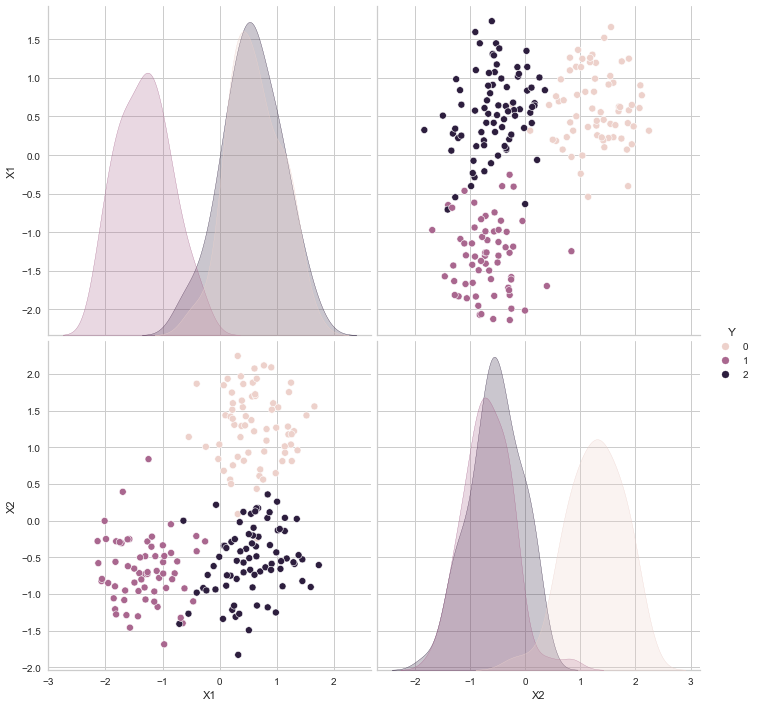

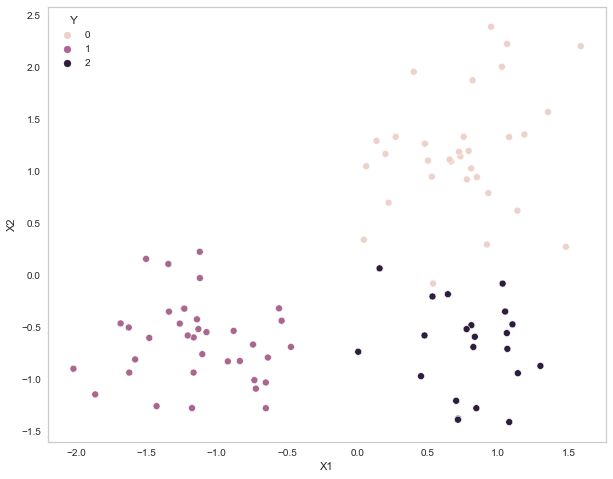

In [4]:
# 예제 데이터 로딩
X, Y = make_blobs(n_samples=300, centers=[[1,1], [-1,-1], [1,-1]], 
                  cluster_std=0.5, random_state=123)

# 데이터분리 및 스케일링
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=123)
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# 예제 데이터 시각화
X_label, Y_label = ['X1', 'X2'], ['Y']
df_train = pd.concat([pd.DataFrame(X_train, columns=X_label), 
                      pd.DataFrame(Y_train, columns=Y_label)], axis=1)
sns.pairplot(df_train, hue='Y', size=5)
plt.grid()
plt.show()

# Test 데이터 시각화
df_test = pd.concat([pd.DataFrame(X_test, columns=X_label), 
                     pd.DataFrame(Y_test, columns=Y_label)], axis=1)
plt.figure(figsize = (10,8))
sns.scatterplot(x='X1', y='X2', hue='Y', data=df_test)
plt.grid()
plt.show()

### `K-means` 알고리즘

In [5]:
# 모델링
model_kmeans = KMeans(n_clusters=3, random_state=123)
model_kmeans.fit(X_train, Y_train)
Y_trpred = model_kmeans.predict(X_train)
Y_tepred = model_kmeans.predict(X_test)

In [6]:
# 성능검증
measures_cluster(Y_test, X_test, Y_tepred)

,Silhouette,ARI,AMI
Score,0.600871,0.888061,0.878368


True


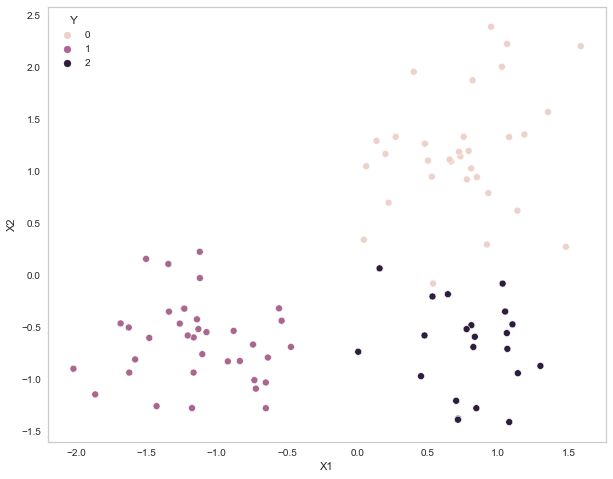

Predict


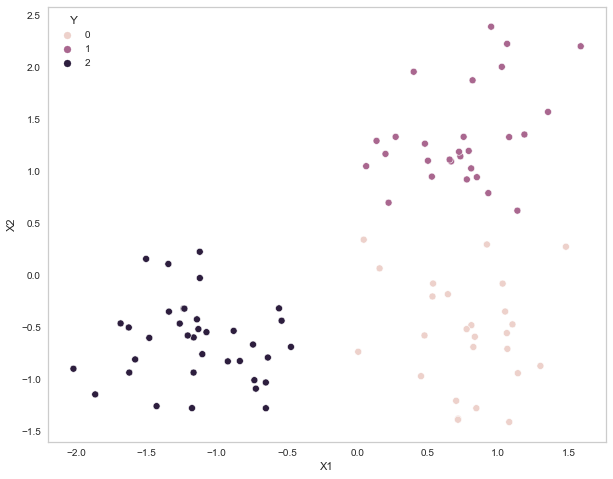

In [7]:
# 성능시각화
print('True')
plt.figure(figsize = (10,8))
sns.scatterplot(x='X1', y='X2', hue='Y', data=df_test)
plt.grid()
plt.show()
print('Predict')
df_tepred = pd.concat([pd.DataFrame(X_test, columns=X_label), 
                       pd.DataFrame(Y_tepred, columns=Y_label)], axis=1)
plt.figure(figsize = (10,8))
sns.scatterplot(x='X1', y='X2', hue='Y', data=df_tepred)
plt.grid()
plt.show()

### `HC` 알고리즘

In [8]:
# 데이터의 거리행렬 변환
X_tr_dist = pdist(X_train, metric='euclidean')
X_tr_dist = pd.DataFrame(squareform(X_tr_dist), 
                         index=['ID_'+str(i) for i in range(X_train.shape[0])], 
                         columns=['ID_'+str(i) for i in range(X_train.shape[0])])
X_tr_dist

,ID_0,ID_1,ID_2,ID_3,ID_4,ID_5,ID_6,ID_7,ID_8,ID_9,...,ID_200,ID_201,ID_202,ID_203,ID_204,ID_205,ID_206,ID_207,ID_208,ID_209
ID_0,0.000000,2.418026,1.051861,1.555202,2.908564,0.936614,1.575823,1.019084,1.007783,0.905861,...,2.019505,1.997088,1.501088,1.747583,0.308059,2.453403,2.254486,0.714185,2.543298,2.622776
ID_1,2.418026,0.000000,1.608582,3.286880,0.508148,2.724982,1.049261,2.972862,1.736570,3.303189,...,1.408699,2.342676,1.931364,2.978888,2.120446,0.411691,0.251506,1.728228,0.219992,0.802444
ID_2,1.051861,1.608582,0.000000,2.460355,2.040672,1.801287,0.593525,1.970840,1.163618,1.937564,...,0.975066,1.243490,0.658769,2.457085,0.762317,1.789785,1.526873,0.725947,1.671814,1.616362
ID_3,1.555202,3.286880,2.460355,0.000000,3.788572,0.659079,2.816206,0.541977,1.567623,1.288277,...,3.415100,3.545716,3.021582,0.601489,1.745188,3.125881,3.052884,1.789590,3.477379,3.775933
ID_4,2.908564,0.508148,2.040672,3.788572,0.000000,3.232452,1.453669,3.480814,2.243637,3.800508,...,1.629863,2.589805,2.261538,3.462571,2.606997,0.739492,0.735992,2.228562,0.370551,0.769276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ID_205,2.453403,0.411691,1.789785,3.125881,0.739492,2.614604,1.296967,2.870590,1.636330,3.301400,...,1.767164,2.669792,2.210968,2.758113,2.174786,0.000000,0.284883,1.740579,0.608566,1.212730
ID_206,2.254486,0.251506,1.526873,3.052884,0.735992,2.504116,1.015956,2.755110,1.515115,3.124697,...,1.488494,2.385180,1.927993,2.732624,1.965178,0.284883,0.000000,1.550313,0.469615,1.014402
ID_207,0.714185,1.728228,0.725947,1.789590,2.228562,1.140288,1.032326,1.348653,0.472900,1.575870,...,1.633206,1.950120,1.370595,1.734962,0.460098,1.740579,1.550313,0.000000,1.871107,2.038760
ID_208,2.543298,0.219992,1.671814,3.477379,0.370551,2.902486,1.087800,3.146739,1.917819,3.438594,...,1.334524,2.288129,1.921768,3.184613,2.240383,0.608566,0.469615,1.871107,0.000000,0.614269


In [9]:
# Linkage 계산
X_tr_link = linkage(X_tr_dist, method='ward')
X_tr_link = pd.DataFrame(X_tr_link, 
                         columns=['ID First', 'ID Second', 'Distance', 'No. of Items in Clust.'])
X_tr_link

,ID First,ID Second,Distance,No. of Items in Clust.
0,108.0,115.0,0.186506,2.0
1,126.0,128.0,0.198153,2.0
2,82.0,163.0,0.255632,2.0
3,68.0,155.0,0.269243,2.0
4,6.0,43.0,0.297557,2.0
...,...,...,...,...
204,409.0,410.0,39.005343,53.0
205,403.0,411.0,43.358626,61.0
206,412.0,414.0,63.633238,93.0
207,415.0,416.0,142.240335,154.0


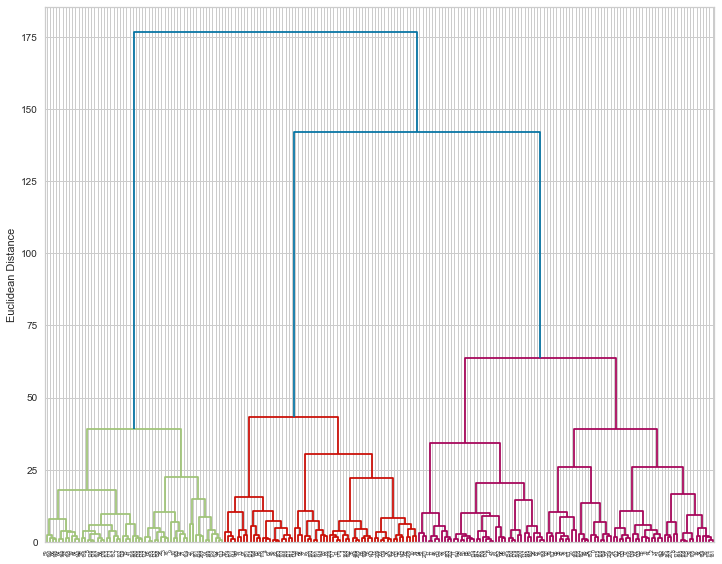

In [10]:
# Dendrogram 시각화
plt.figure(figsize=(10,8))
dendrogram(X_tr_link, orientation='top',
           distance_sort='ascending', 
           show_leaf_counts=True)
plt.tight_layout()
plt.ylabel('Euclidean Distance')
plt.show()

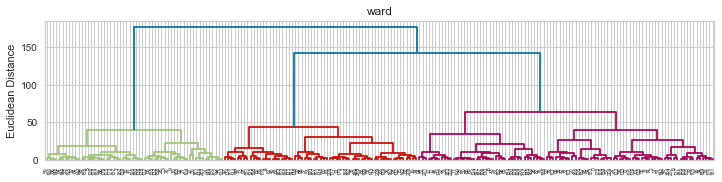

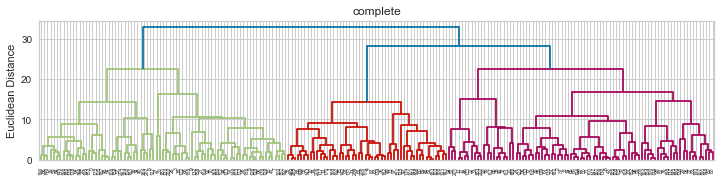

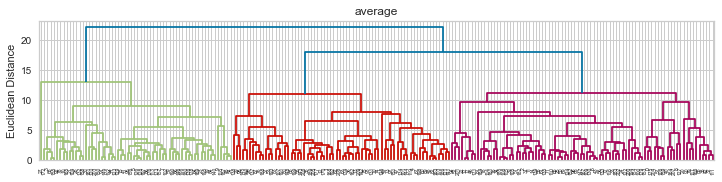

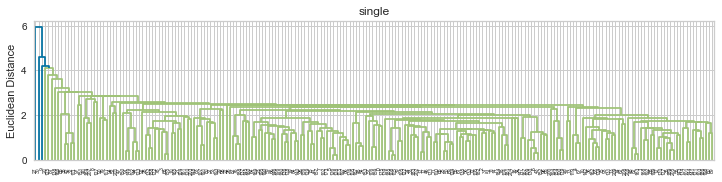

In [11]:
# Linkage 종류에 따른 Dendrogram 차이 확인
linkage_set = ['ward', 'complete', 'average', 'single']
for link in linkage_set:
    X_tr_link = linkage(X_tr_dist, method=link)
    plt.figure(figsize=(10,2.5))
    dendrogram(X_tr_link, orientation='top',
               distance_sort='ascending', 
               show_leaf_counts=True)
    plt.tight_layout()
    plt.title(link)
    plt.ylabel('Euclidean Distance')
    plt.show()

ward


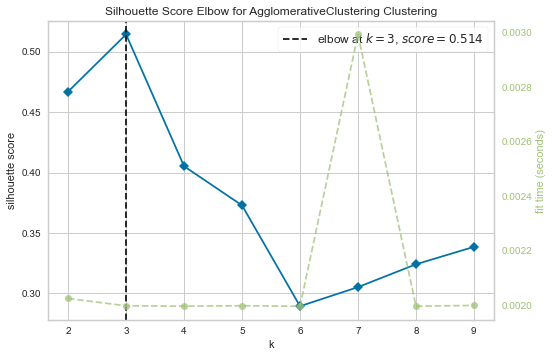

complete


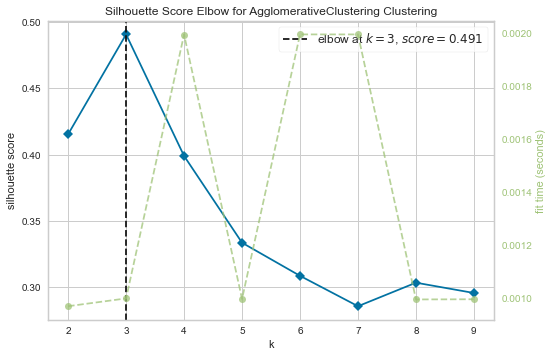

average


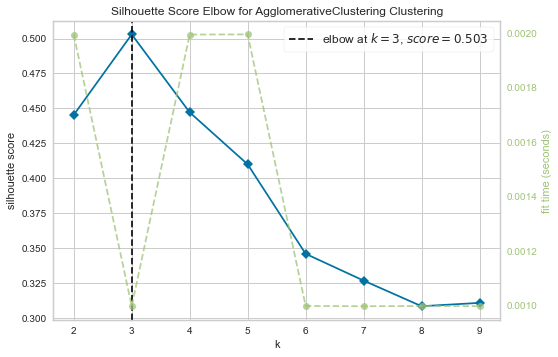

single


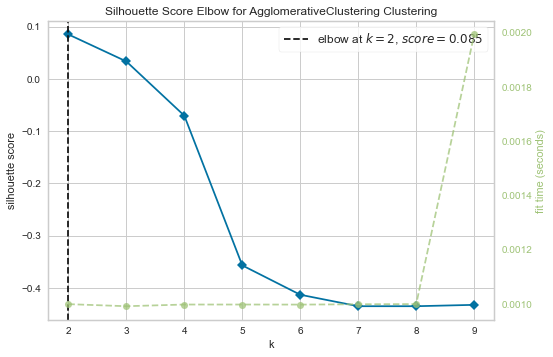

In [12]:
# Number of Cluster 추정
linkage_set = ['ward', 'complete', 'average', 'single']
for link in linkage_set:
    print(link)
    model_link = AgglomerativeClustering(linkage=link, affinity='euclidean')
    plot_elbow = KElbowVisualizer(model_link, k=(2, 10), metric='silhouette', 
                                  timings=True, locate_elbow=True)
    plot_elbow.fit(X_train)
    plot_elbow.show()

In [13]:
# Cluster 추정 및 예측
opt_clustnum = 3
opt_linkage = 'ward'
model_aggclust = AgglomerativeClustering(n_clusters=opt_clustnum, 
                                         linkage=opt_linkage)
Y_trpred = model_aggclust.fit_predict(X_train)
Y_tepred = model_aggclust.fit_predict(X_test)

In [14]:
# 성능검증
measures_cluster(Y_test, X_test, Y_tepred)

,Silhouette,ARI,AMI
Score,0.597573,0.942043,0.910336


True


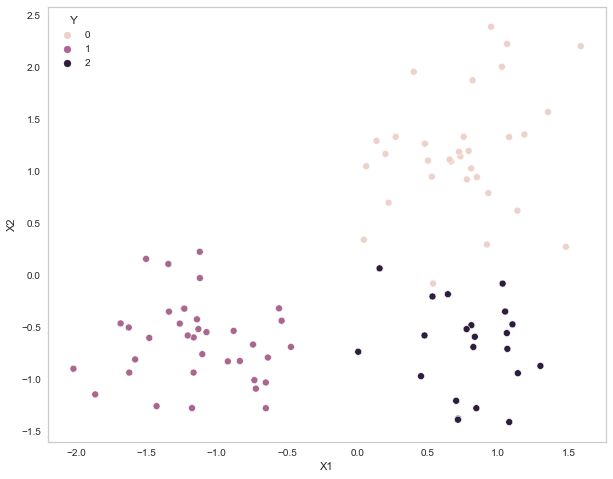

Predict


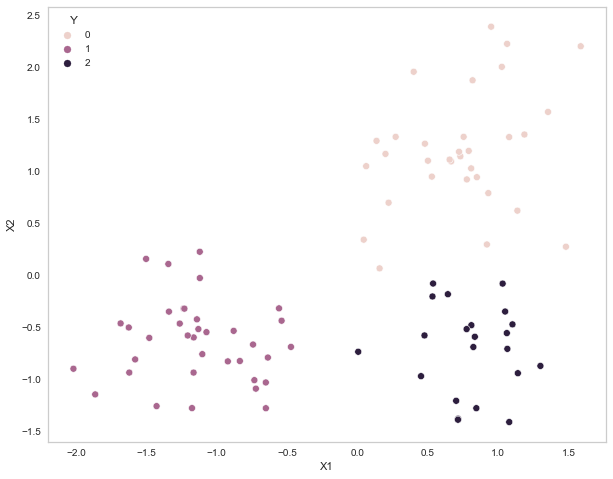

In [15]:
# 성능시각화
print('True')
plt.figure(figsize = (10,8))
sns.scatterplot(x='X1', y='X2', hue='Y', data=df_test)
plt.grid()
plt.show()
print('Predict')
df_tepred = pd.concat([pd.DataFrame(X_test, columns=X_label), 
                       pd.DataFrame(Y_tepred, columns=Y_label)], axis=1)
plt.figure(figsize = (10,8))
sns.scatterplot(x='X1', y='X2', hue='Y', data=df_tepred)
plt.grid()
plt.show()

### `DBC` 알고리즘

In [16]:
# 모델링
model_dbscan = DBSCAN(eps=0.5, min_samples=2)
Y_tepred = model_dbscan.fit_predict(X_test)

In [17]:
# 성능검증
measures_cluster(Y_test, X_test, Y_tepred)

,Silhouette,ARI,AMI
Score,0.252418,0.009229,0.073155


True


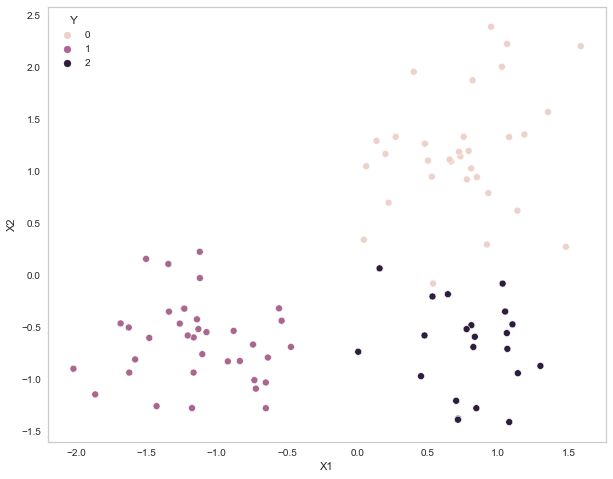

Predict


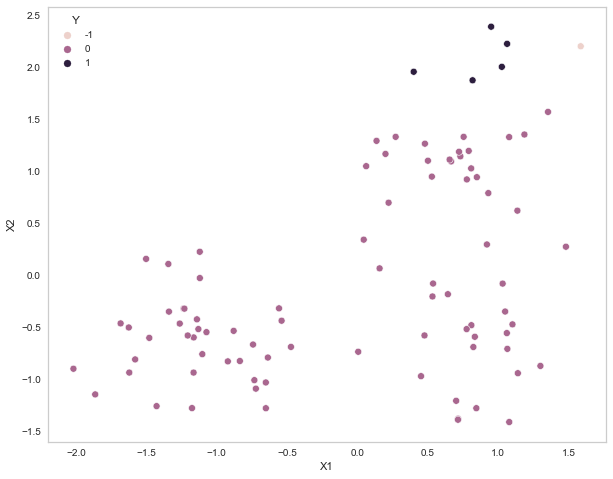

In [18]:
# 성능시각화
print('True')
plt.figure(figsize = (10,8))
sns.scatterplot(x='X1', y='X2', hue='Y', data=df_test)
plt.grid()
plt.show()
print('Predict')
df_tepred = pd.concat([pd.DataFrame(X_test, columns=X_label), 
                       pd.DataFrame(Y_tepred, columns=Y_label)], axis=1)
plt.figure(figsize = (10,8))
sns.scatterplot(x='X1', y='X2', hue='Y', data=df_tepred)
plt.grid()
plt.show()

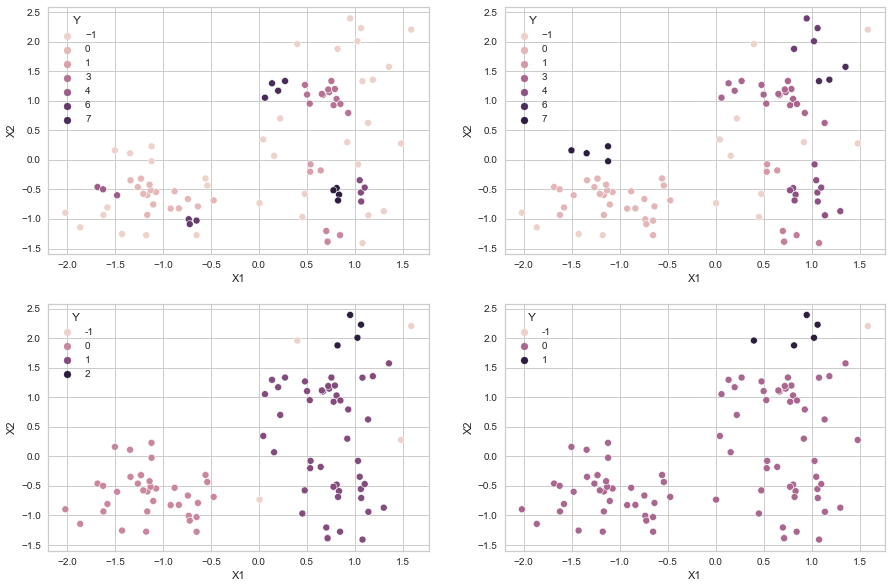

,Silhouette,ARI,AMI
Score,0.003281,0.192467,0.385395
Score,0.264341,0.505130,0.567357
Score,0.353569,0.612137,0.666465
Score,0.252418,0.009229,0.073155


In [19]:
# eps 파라미터 변경에 따른 성능 변화
eps_list = [0.2, 0.3, 0.4, 0.5]
score_para = pd.DataFrame()
fig, axes = plt.subplots(2, 2, figsize=(15,10))
for eps, ax in zip(eps_list, axes.ravel()):
    ## 모델링
    model_dbscan = DBSCAN(eps=eps, min_samples=3)
    Y_tepred = model_dbscan.fit_predict(X_test)
    ## 성능검증
    score_para = pd.concat([score_para, measures_cluster(Y_test, X_test, Y_tepred)], axis=0)
    ## 성능시각화
    df_tepred = pd.concat([pd.DataFrame(X_test, columns=X_label), 
                           pd.DataFrame(Y_tepred, columns=Y_label)], axis=1)
    sns.scatterplot(x='X1', y='X2', hue='Y', data=df_tepred, ax=ax)
plt.show()
score_para

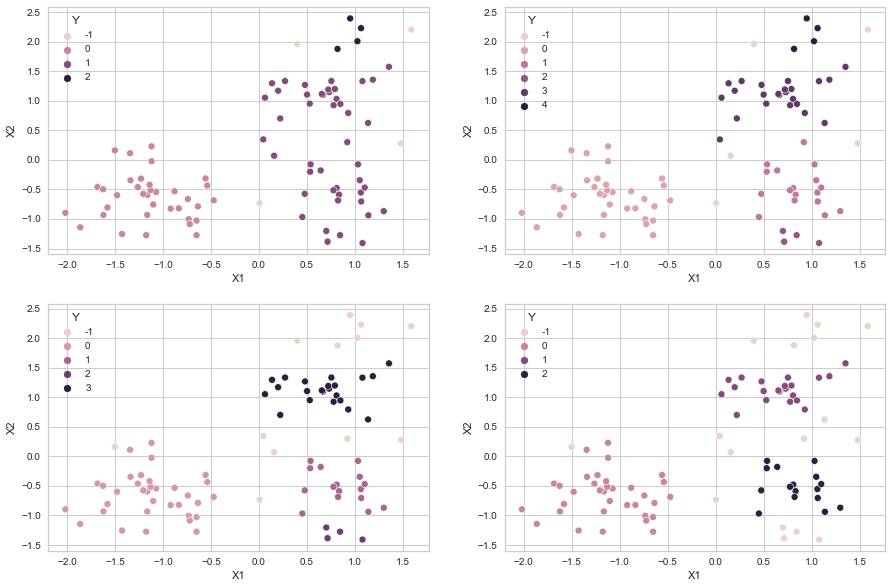

,Silhouette,ARI,AMI
Score,0.353569,0.612137,0.666465
Score,0.480663,0.773298,0.744754
Score,0.458779,0.749176,0.734446
Score,0.437187,0.716631,0.709024


In [20]:
# min_samples 파라미터 변경에 따른 성능 변화
min_list = [3, 4, 5, 6]
score_para = pd.DataFrame()
fig, axes = plt.subplots(2, 2, figsize=(15,10))
for m_sam, ax in zip(min_list, axes.ravel()):
    ## 모델링
    model_dbscan = DBSCAN(eps=0.4, min_samples=m_sam)
    Y_tepred = model_dbscan.fit_predict(X_test)
    ## 성능검증
    score_para = pd.concat([score_para, measures_cluster(Y_test, X_test, Y_tepred)], axis=0)
    ## 성능시각화
    df_tepred = pd.concat([pd.DataFrame(X_test, columns=X_label), 
                           pd.DataFrame(Y_tepred, columns=Y_label)], axis=1)
    sns.scatterplot(x='X1', y='X2', hue='Y', data=df_tepred, ax=ax)
plt.show()
score_para

- `복잡한 데이터`에서의 성능

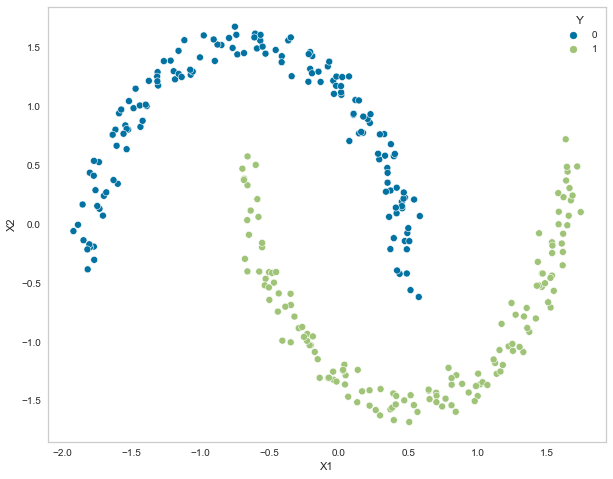

In [21]:
# 예제 데이터 로딩
X, Y = make_moons(n_samples=1000, noise = 0.05, random_state=123)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=123)
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Test 데이터 시각화
df_test = pd.concat([pd.DataFrame(X_test, columns=X_label), 
                     pd.DataFrame(Y_test, columns=Y_label)], axis=1)
plt.figure(figsize = (10,8))
sns.scatterplot(x='X1', y='X2', hue='Y', data=df_test)
plt.grid()
plt.show()

In [22]:
# 모델링
## K-means
model_kmeans = KMeans(n_clusters=3, random_state=123)
model_kmeans.fit(X_train, Y_train)
Y_tepred_km = model_kmeans.predict(X_test)

## HC
model_aggclust = AgglomerativeClustering(n_clusters=2, 
                                         linkage='ward')
Y_tepred_agg = model_aggclust.fit_predict(X_test)

## DBC
model_dbscan = DBSCAN(eps=0.5, min_samples=3)
Y_tepred_db = model_dbscan.fit_predict(X_test)

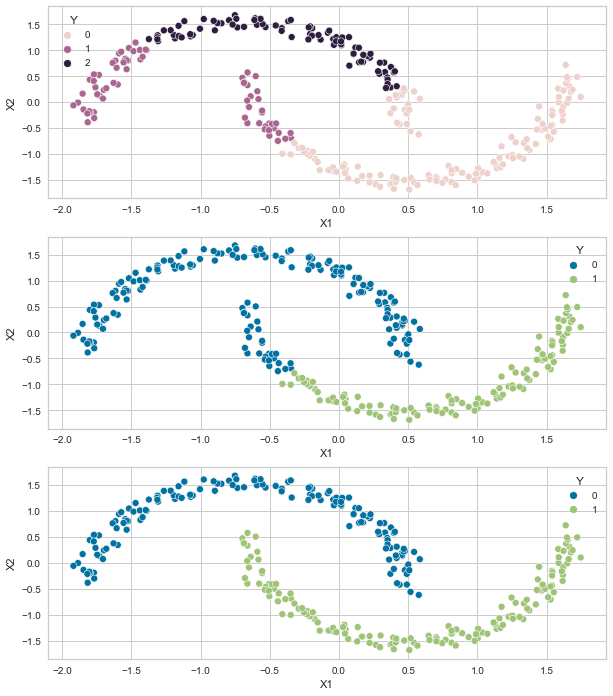

,Silhouette,ARI,AMI
K-means,0.429005,0.381695,0.371575
HC,0.448982,0.649583,0.626264
DBC,0.392909,1.000000,1.000000


In [23]:
# 성능검증 및 시각화
fig, axes = plt.subplots(3, 1, figsize=(10,12))
score_comparison = pd.DataFrame()
for pred, ax in zip([Y_tepred_km, Y_tepred_agg, Y_tepred_db], axes):
    score_comparison = pd.concat([score_comparison, 
                                  measures_cluster(Y_test, X_test, pred)], axis=0)
    X_label, Y_label = ['X1', 'X2'], ['Y']
    df_tepred = pd.concat([pd.DataFrame(X_test, columns=X_label), 
                           pd.DataFrame(pred, columns=Y_label)], axis=1)
    display()
    sns.scatterplot(x='X1', y='X2', hue='Y', data=df_tepred, ax=ax)
plt.show()
score_comparison.index = ['K-means', 'HC', 'DBC']
score_comparison

## 차원변환 문제

### `Data Preprocessing`

> [**성격테스트**](https://vincentarelbundock.github.io/Rdatasets/doc/psych/bfi.html)

| **변수명** 	| **설명** 	|
|:---:	|:---:	|
| A1 	| 다른 사람의 감정에 무관심합니다. 	|
| A2 	| 다른 사람의 안부를 물어봅니다. 	|
| A3 	| 다른 사람을 위로하는 방법을 압니다. 	|
| A4 	| 아이들을 사랑합니다. 	|
| A5 	| 사람들이 편안하게 느끼는 편입니다. 	|
| C1 	| 내 일에 엄격합니다. 	|
| C2 	| 모든 것이 완벽해 질 때까지 계속합니다. 	|
| C3 	| 계획에 따라 일을 합니다. 	|
| C4 	| 중간적인 대안으로만 일을 합니다. 	|
| C5 	| 내 시간을 낭비하는 편입니다. 	|
| E1 	| 말을 많이 하지 않습니다. 	|
| E2 	| 다른 사람에게 다가가는 것이 어렵습니다. 	|
| E3 	| 사람들을 사로잡는 방법을 알고 있습니다. 	|
| E4 	| 쉽게 친구들을 사귈 수 있습니다. 	|
| E5 	| 책임감을 느끼는 편입니다. 	|
| N1 	| 쉽게 화를 냅니다. 	|
| N2 	| 쉽게 짜증을 냅니다. 	|
| N3 	| 기분 변화가 자주 있습니다. 	|
| N4 	| 종종 우울함을 느낍니다. 	|
| N5 	| 쉽게 겁에 질립니다. 	|
| O1 	| 아이디어가 많습니다. 	|
| O2 	| 어려운 내용들은 피하는 것이 좋습니다. 	|
| O3 	| 깊은 대화를 나누는 것이 좋습니다. 	|
| O4 	| 사물을 관찰하는데 많은 시간을 보냅니다. 	|
| O5 	| 주제를 깊이 탐구하는 것을 좋아하지 않습니다. 	|
| Gender 	| 남성=1, 여성=2 	|
| Education 	| 중학교=1, 고등학교=2, 전문대학=3, 종합대학=4, 대학원=5 	|
| Age 	| 나이 	|

In [24]:
# 예제 데이터 로딩
# 아래 둘 중 하나의 방법으로 데이터 로딩
# df = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/psych/bfi.csv').iloc[:,1:]
df = pd.read_csv(os.path.join('.', 'Data', 'PersonalityProject', 'bfi.csv')).iloc[:,1:]
df.drop(['education', 'age'],axis=1,inplace=True)
df.dropna(axis=0, inplace=True)

# 데이터분리 및 스케일링
Y = df.iloc[:,-1:] - 1
X = df[[col for col in df.columns if col not in Y.columns]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=123)
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

pd.DataFrame(X_test, columns=X.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
A1,731.0,-1.397271e-16,1.000685,-1.017064,-1.017064,-0.302185,0.412693,2.557330
A2,731.0,1.139080e-16,1.000685,-3.304129,-0.712586,0.151262,1.015110,1.015110
A3,731.0,-2.591027e-16,1.000685,-2.736886,-0.462543,0.295571,1.053686,1.053686
A4,731.0,-2.941863e-16,1.000685,-2.504240,-0.471746,0.205752,0.883250,0.883250
A5,731.0,2.551539e-17,1.000685,-2.784872,-0.417731,0.371316,0.371316,1.160363
C1,731.0,2.624440e-16,1.000685,-3.106996,-0.526071,0.334237,0.334237,1.194546
C2,731.0,-3.174235e-16,1.000685,-2.662089,-0.346357,0.425554,0.425554,1.197465
C3,731.0,3.233468e-16,1.000685,-2.706506,-0.304496,0.496175,0.496175,1.296845
C4,731.0,-9.629020e-17,1.000685,-1.112894,-1.112894,-0.376672,0.359550,2.568217
C5,731.0,-1.318295e-16,1.000685,-1.411196,-0.790881,-0.170566,1.070065,1.690381


### `FA` 알고리즘

- Baseline

,Silhouette,ARI,AMI
Score,0.125196,0.009463,0.005544


,Silhouette,ARI,AMI
Score,0.129963,-0.000339,-0.000947


True


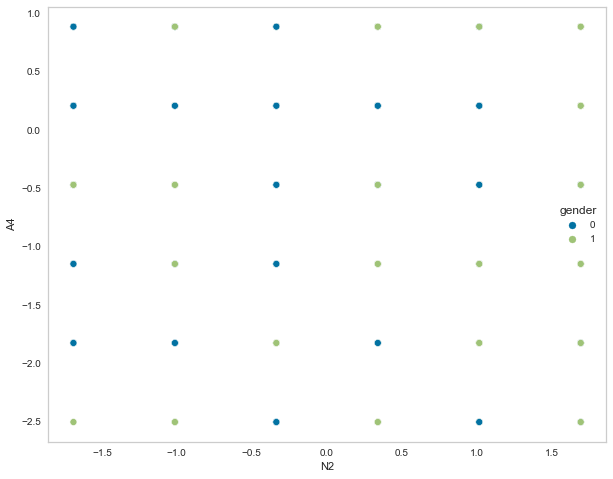

Predict


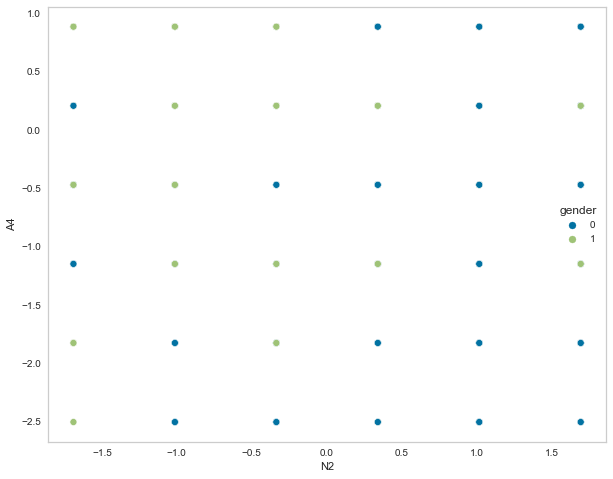

In [25]:
# 모델링
model_kmeans = KMeans(n_clusters=len(np.unique(Y_train)), random_state=123)
model_kmeans.fit(X_train, Y_train)
Y_trpred = model_kmeans.predict(X_train)
Y_tepred = model_kmeans.predict(X_test)

# 성능확인
display(measures_cluster(np.ravel(Y_train), X_train, Y_trpred))
display(measures_cluster(np.ravel(Y_test), X_test, Y_tepred))

# 성능시각화
print('True')
X_test_sub = pd.DataFrame(X_test, columns=X.columns).sample(n=2, axis='columns')
df_test = pd.concat([X_test_sub, 
                     Y_test.reset_index().iloc[:,[1]]], axis=1)
plt.figure(figsize = (10,8))
sns.scatterplot(x=df_test.columns[0], y=df_test.columns[1], 
                hue=df_test.columns[2], data=df_test)
plt.grid()
plt.show()
print('Predict')
df_tepred = pd.concat([X_test_sub, 
                       pd.DataFrame(Y_tepred, columns=[Y_test.columns[0]])], 
                       axis=1)
plt.figure(figsize = (10,8))
sns.scatterplot(x=df_tepred.columns[0], y=df_tepred.columns[1], 
                hue=df_tepred.columns[2], data=df_tepred)
plt.grid()
plt.show()

In [26]:
# 요인추출 가능성 확인
# Bartlett's Test
# 단위행렬 보다 변수들이 상관성이 있는지(p-value작고) 여부 파악
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

statistics_bar, p_value = calculate_bartlett_sphericity(X_train)
statistics_bar, p_value

(12912.627362022815, 0.0)

In [27]:
# 요인추출 가능성 확인
# Kalser-Meyer-Olkln (KMO) Test
# 모든 변수들 사이에서 분산의 비율 파악
# KMO 통계량이 크고(p-value작고) 공통된 변수를 추출하는 요인분석 적합
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_each, kmo_all = calculate_kmo(X_train)
kmo_each, kmo_all

(array([0.74744586, 0.8262802 , 0.87906982, 0.87869597, 0.90002624,
        0.83977443, 0.78738156, 0.85816186, 0.82095069, 0.85912125,
        0.84023622, 0.87399732, 0.89436445, 0.87222454, 0.88747407,
        0.77708163, 0.77935741, 0.85278161, 0.88019305, 0.85313161,
        0.84461515, 0.76601823, 0.84334107, 0.7550672 , 0.76368207]),
 0.8444195616448924)

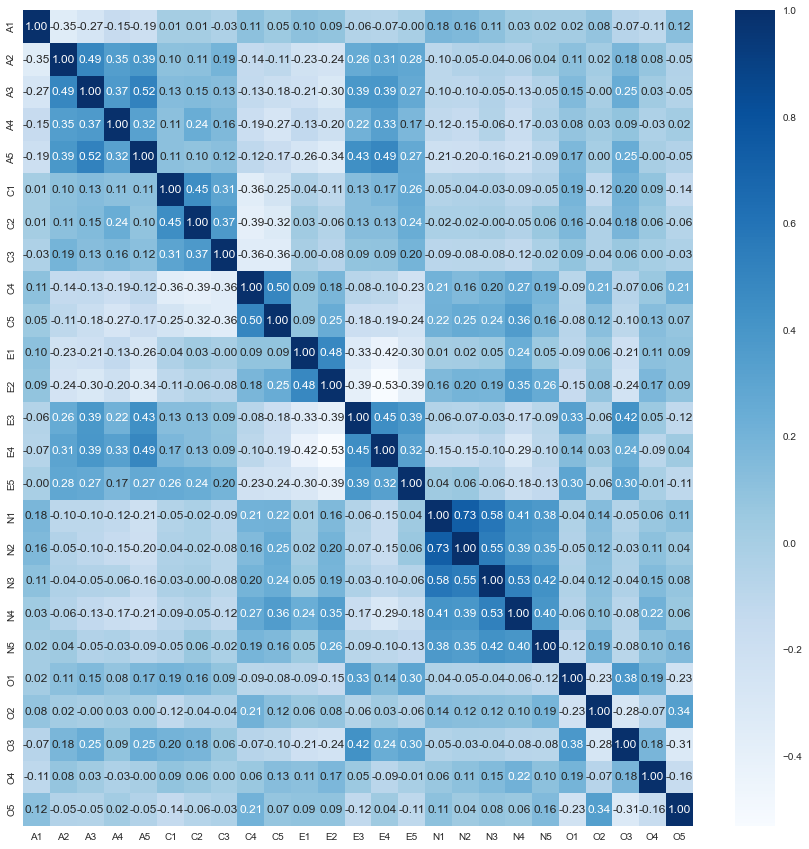

In [28]:
# 상관관계
# 강하게 묶이는 변수 관계성 확인
plt.figure(figsize=(15,15))
sns.heatmap(pd.DataFrame(X_train, columns=X.columns).corr(), 
            cmap='Blues', annot=True, fmt='.2f')
plt.show()

In [29]:
# 모델링1
# 최적 요인 수 추론
model_fa = FactorAnalyzer()
model_fa.fit(X_train)
eigenvalues, factor_eigenvalues = model_fa.get_eigenvalues()
fa_result = pd.DataFrame([eigenvalues, factor_eigenvalues], 
                          index=['Original_Eigenvalues', 'Factor_Eigenvalues']).T
fa_result

,Original_Eigenvalues,Factor_Eigenvalues
0,5.157681,4.545400
1,2.743255,2.192211
2,2.149237,1.536165
3,1.843196,1.029457
4,1.569337,0.854898
5,1.113521,0.405891
6,0.826148,0.186328
7,0.800852,0.116956
8,0.724156,0.062229
9,0.701902,0.014107


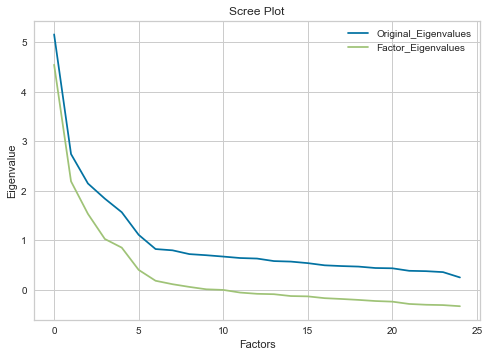

In [30]:
# Create scree plot using matplotlib
fa_result.plot()
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

In [31]:
# 모델링2
# 최적 요인 수 비교를 위한 귀무가설/대중주장/H0 확인
# 요인 적재량 확인
# (a) varimax (orthogonal rotation)
# (b) promax (oblique rotation)
# (c) oblimin (oblique rotation)
# (d) oblimax (orthogonal rotation)
# (e) quartimin (oblique rotation)
# (f) quartimax (orthogonal rotation)
# (g) equamax (orthogonal rotation)
num_factors = X_train.shape[1]
model_fa = FactorAnalyzer(n_factors=num_factors, rotation='varimax')
model_fa.fit(X_train)
colnames = ['Factor' + str(i) for i in range(num_factors)]
fa_loadings = pd.DataFrame(model_fa.loadings_, 
                           index=X.columns,
                           columns=colnames)
fa_loadings

,Factor0,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,...,Factor15,Factor16,Factor17,Factor18,Factor19,Factor20,Factor21,Factor22,Factor23,Factor24
A1,0.118038,-0.036756,-0.122556,0.024147,0.090877,0.602497,0.029758,-0.084333,0.068587,-0.030100,...,0.016194,-0.011047,0.045704,-0.013277,0.017158,0.019238,0.020831,0.013592,0.010510,0.0
A2,-0.000830,0.162353,0.351674,0.095423,0.034719,-0.557471,0.047803,0.034589,0.221317,0.222557,...,0.059672,-0.066368,0.169915,-0.057751,0.020849,0.065861,0.057730,0.045375,0.037234,0.0
A3,-0.010373,0.136039,0.651032,0.113323,-0.013384,-0.313034,-0.043032,-0.011660,0.063466,0.159540,...,-0.064783,0.009307,0.040556,-0.024177,0.055637,0.022150,0.131795,0.013479,0.001345,0.0
A4,-0.071029,0.108116,0.300557,0.167496,0.061637,-0.153359,-0.121386,-0.021302,0.020005,0.544513,...,0.008600,0.006593,-0.003821,0.004837,0.005845,-0.000766,-0.000492,0.000004,-0.000621,0.0
A5,-0.161222,0.229682,0.687282,0.058662,-0.006297,-0.128107,-0.022228,0.032730,0.059583,0.080483,...,0.031508,-0.015270,-0.028257,-0.026787,-0.042640,-0.015630,-0.099910,-0.012756,-0.002825,0.0
C1,-0.014202,0.071140,0.085657,0.639462,-0.127454,0.033480,-0.019300,0.102558,0.067754,-0.037392,...,0.032607,0.016245,0.167993,-0.025725,-0.021884,-0.025260,-0.001119,-0.004653,-0.009200,0.0
C2,0.013594,-0.021457,0.062471,0.746702,-0.015514,0.019256,-0.048551,0.038060,0.067225,0.185645,...,-0.016309,-0.022536,-0.181948,0.027522,0.042507,0.040702,0.009196,0.008471,0.012403,0.0
C3,-0.061478,-0.007113,0.070359,0.481884,0.017204,-0.064055,-0.197216,-0.002848,0.059497,0.024186,...,-0.005575,0.009816,-0.003271,0.004028,0.007272,-0.003302,-0.003601,-0.002369,-0.001894,0.0
C4,0.137528,-0.068733,-0.006655,-0.534734,0.232533,0.135584,0.348263,0.126820,-0.017479,-0.047619,...,0.012535,0.026073,0.004808,-0.016114,0.012095,0.012348,0.004998,0.000932,0.000010,0.0
C5,0.208989,-0.094202,-0.099422,-0.359077,0.072546,0.009441,0.636741,0.125736,-0.062397,-0.133892,...,-0.001992,-0.003572,0.002595,-0.007734,0.000010,-0.005131,-0.000421,0.001195,-0.000005,0.0


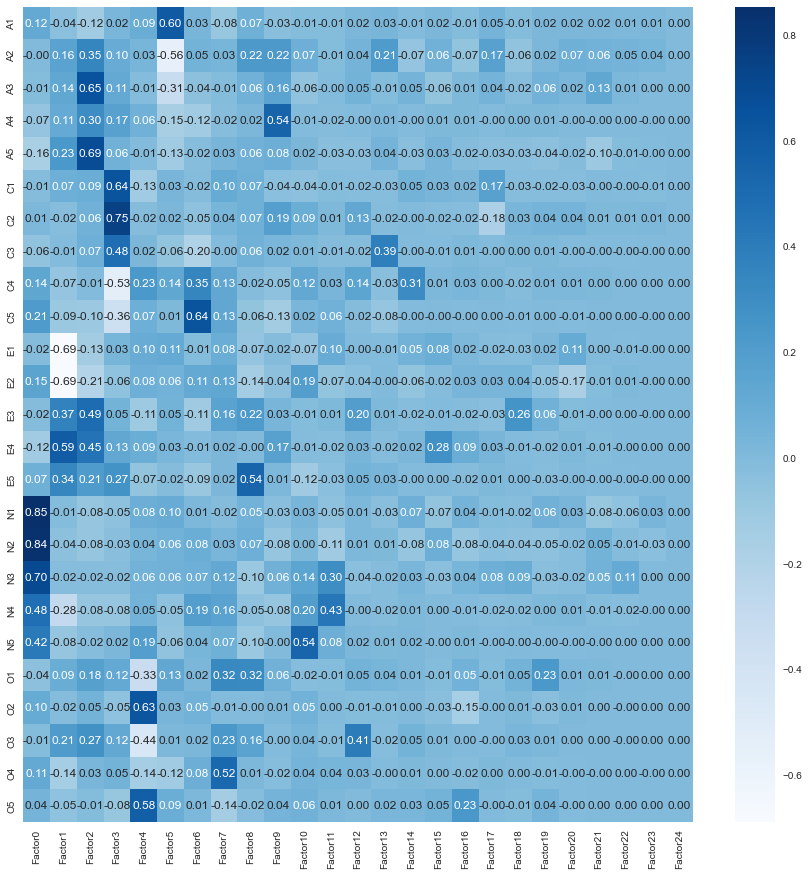

,Factor0,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15,Factor16,Factor17,Factor18,Factor19,Factor20,Factor21,Factor22,Factor23,Factor24
A1,0.118038,-0.036756,-0.122556,0.024147,0.090877,0.602497,0.029758,-0.084333,0.068587,-0.030100,-0.010971,-0.009802,0.019842,0.030786,-0.007436,0.016194,-0.011047,0.045704,-0.013277,0.017158,0.019238,0.020831,0.013592,0.010510,0.000000
A2,-0.000830,0.162353,0.351674,0.095423,0.034719,-0.557471,0.047803,0.034589,0.221317,0.222557,0.071872,-0.011037,0.043376,0.210413,-0.073050,0.059672,-0.066368,0.169915,-0.057751,0.020849,0.065861,0.057730,0.045375,0.037234,0.000000
A3,-0.010373,0.136039,0.651032,0.113323,-0.013384,-0.313034,-0.043032,-0.011660,0.063466,0.159540,-0.057028,-0.002791,0.049822,-0.011463,0.045559,-0.064783,0.009307,0.040556,-0.024177,0.055637,0.022150,0.131795,0.013479,0.001345,0.000000
A4,-0.071029,0.108116,0.300557,0.167496,0.061637,-0.153359,-0.121386,-0.021302,0.020005,0.544513,-0.005765,-0.017641,-0.002602,0.013055,-0.004378,0.008600,0.006593,-0.003821,0.004837,0.005845,-0.000766,-0.000492,0.000004,-0.000621,0.000000
A5,-0.161222,0.229682,0.687282,0.058662,-0.006297,-0.128107,-0.022228,0.032730,0.059583,0.080483,0.016260,-0.026236,-0.030426,0.043665,-0.027467,0.031508,-0.015270,-0.028257,-0.026787,-0.042640,-0.015630,-0.099910,-0.012756,-0.002825,0.000000
C1,-0.014202,0.071140,0.085657,0.639462,-0.127454,0.033480,-0.019300,0.102558,0.067754,-0.037392,-0.041089,-0.011871,-0.021790,-0.025518,0.051351,0.032607,0.016245,0.167993,-0.025725,-0.021884,-0.025260,-0.001119,-0.004653,-0.009200,0.000000
C2,0.013594,-0.021457,0.062471,0.746702,-0.015514,0.019256,-0.048551,0.038060,0.067225,0.185645,0.086890,0.009934,0.126657,-0.017624,-0.001479,-0.016309,-0.022536,-0.181948,0.027522,0.042507,0.040702,0.009196,0.008471,0.012403,0.000000
C3,-0.061478,-0.007113,0.070359,0.481884,0.017204,-0.064055,-0.197216,-0.002848,0.059497,0.024186,0.009503,-0.014703,-0.017976,0.387428,-0.003563,-0.005575,0.009816,-0.003271,0.004028,0.007272,-0.003302,-0.003601,-0.002369,-0.001894,0.000000
C4,0.137528,-0.068733,-0.006655,-0.534734,0.232533,0.135584,0.348263,0.126820,-0.017479,-0.047619,0.118966,0.033947,0.142993,-0.027380,0.307553,0.012535,0.026073,0.004808,-0.016114,0.012095,0.012348,0.004998,0.000932,0.000010,0.000000
C5,0.208989,-0.094202,-0.099422,-0.359077,0.072546,0.009441,0.636741,0.125736,-0.062397,-0.133892,0.024820,0.062120,-0.015166,-0.078033,-0.002350,-0.001992,-0.003572,0.002595,-0.007734,0.000010,-0.005131,-0.000421,0.001195,-0.000005,0.000000


,Factor0,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,...,Factor15,Factor16,Factor17,Factor18,Factor19,Factor20,Factor21,Factor22,Factor23,Factor24
Variance,2.509745,1.841106,1.833363,1.811271,1.231400,0.915097,0.683955,0.600773,0.600056,0.489311,...,0.111255,0.106228,0.105921,0.090671,0.078709,0.050064,0.043624,0.017947,0.003808,0.000000
Proportional Variance,0.100390,0.073644,0.073335,0.072451,0.049256,0.036604,0.027358,0.024031,0.024002,0.019572,...,0.004450,0.004249,0.004237,0.003627,0.003148,0.002003,0.001745,0.000718,0.000152,0.000000
Cumulative Variances,0.100390,0.174034,0.247369,0.319819,0.369075,0.405679,0.433037,0.457068,0.481071,0.500643,...,0.559855,0.564104,0.568341,0.571968,0.575116,0.577119,0.578864,0.579582,0.579734,0.579734


In [32]:
# 귀무가설/대중주장/H0에서의 요인과 변수관계 시각화
## Heatmap 시각화
plt.figure(figsize=(15,15))
sns.heatmap(fa_loadings, cmap='Blues', annot=True, fmt='.2f')
plt.show()

## 테이블강조 시각화
criteria = pd.Series([0.5]*num_factors, index=colnames)
fa_loadings_light = fa_loadings.style.highlight_between(left=criteria, right=1, axis=1, 
                                                        props='color:white; background-color:purple;')
criteria = pd.Series([-1]*num_factors, index=colnames)
fa_loadings_light = fa_loadings_light.highlight_between(left=criteria, right=-0.5, axis=1, 
                                                        props='color:white; background-color:purple;')
display(fa_loadings_light)

## 분산설명력 테이블강조
fa_variance = pd.DataFrame(model_fa.get_factor_variance(), columns=colnames,
                           index=['Variance', 'Proportional Variance', 'Cumulative Variances'])
fa_variance

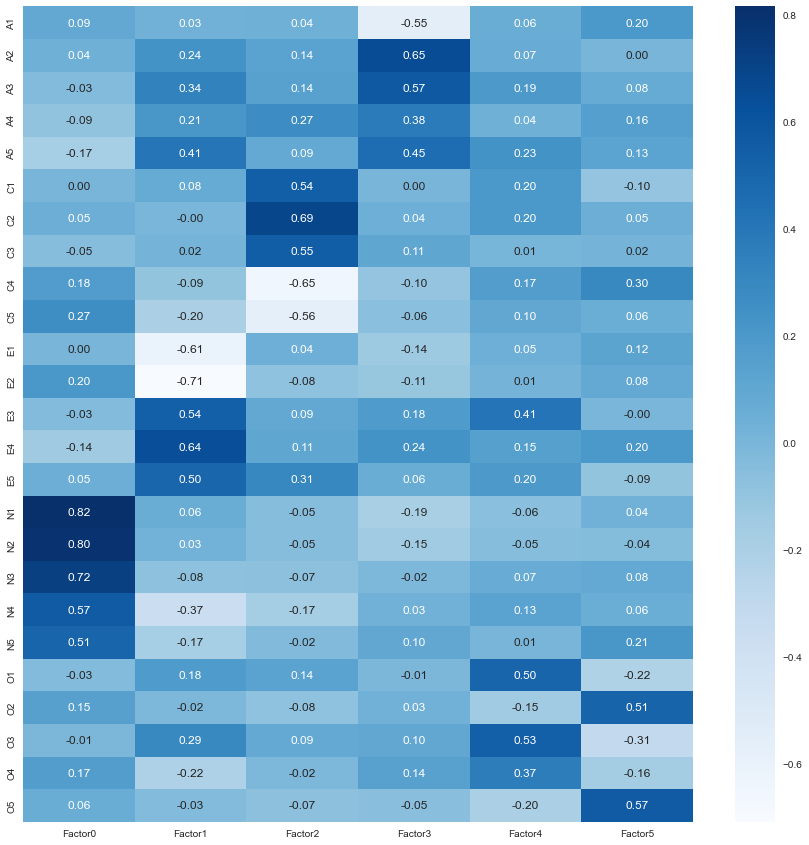

,Factor0,Factor1,Factor2,Factor3,Factor4,Factor5
A1,0.093586,0.033921,0.038239,-0.552072,0.061747,0.200299
A2,0.040214,0.238191,0.136291,0.653532,0.065741,0.001931
A3,-0.034531,0.338140,0.141611,0.572157,0.192530,0.076981
A4,-0.087541,0.211311,0.270229,0.376107,0.041131,0.159681
A5,-0.174701,0.408922,0.087420,0.454451,0.233835,0.127760
C1,0.002248,0.075441,0.538487,0.001540,0.197484,-0.096157
C2,0.053028,-0.002635,0.687095,0.042438,0.200389,0.049499
C3,-0.049461,0.015673,0.547968,0.109766,0.011117,0.015929
C4,0.177919,-0.090171,-0.651196,-0.095430,0.166917,0.295073
C5,0.266002,-0.196608,-0.561214,-0.062713,0.097811,0.055371


,Factor0,Factor1,Factor2,Factor3,Factor4,Factor5
Variance,2.677238,2.596709,2.122585,1.658061,1.213777,1.073464
Proportional Variance,0.107090,0.103868,0.084903,0.066322,0.048551,0.042939
Cumulative Variances,0.107090,0.210958,0.295861,0.362184,0.410735,0.453673


In [33]:
# 모델링
# 최적 요인 수 비교를 위한 대립가설/나의주장/H1 확인
# 대립가설/나의주장/H1에서의 요인과 변수관계 시각화
# (a) varimax (orthogonal rotation)
# (b) promax (oblique rotation)
# (c) oblimin (oblique rotation)
# (d) oblimax (orthogonal rotation)
# (e) quartimin (oblique rotation)
# (f) quartimax (orthogonal rotation)
# (g) equamax (orthogonal rotation)
num_factors = 6
model_fa = FactorAnalyzer(n_factors=num_factors, rotation='varimax')
model_fa.fit(X_train)
colnames = ['Factor' + str(i) for i in range(num_factors)]
fa_loadings = pd.DataFrame(model_fa.loadings_,
                           index=X.columns,
                           columns=colnames)

## Heatmap 시각화
plt.figure(figsize=(15, 15))
sns.heatmap(fa_loadings, cmap='Blues', annot=True, fmt='.2f')
plt.show()

## 테이블강조 시각화
criteria = pd.Series([0.5]*num_factors, index=colnames)
fa_loadings_light = fa_loadings.style.highlight_between(left=criteria, right=1, axis=1,
                                                        props='color:white; background-color:purple;')
criteria = pd.Series([-1]*num_factors, index=colnames)
fa_loadings_light = fa_loadings_light.highlight_between(left=criteria, right=-0.5, axis=1,
                                                        props='color:white; background-color:purple;')
display(fa_loadings_light)

## 분산설명력 테이블강조
fa_variance = pd.DataFrame(model_fa.get_factor_variance(), columns=colnames,
                           index=['Variance', 'Proportional Variance', 'Cumulative Variances'])
fa_variance

In [34]:
# 공통성 추정
# 변수의 분산이 추출된 요인들에 의해 설명되는 정도로 0.5이상 굳
fa_communality = pd.DataFrame(model_fa.get_communalities(), 
                              index=X.columns, columns=['Communality'])

criteria = pd.Series([0.5]*len(fa_communality.columns), index=fa_communality.columns)
fa_communality_light = fa_communality.style.highlight_between(left=criteria, right=1, axis=1, 
                                                              props='color:white; background-color:purple;')
fa_communality_light

,Communality
A1,0.360087
A2,0.508358
A3,0.505942
A4,0.293986
A5,0.482907
C1,0.343913
C2,0.519325
C3,0.315387
C4,0.587879
C5,0.440939


In [35]:
# 변수들이 특정 요인으로 묶이는지 여부 확인
# 설문조사에서는 역으로 특정 항목(요인)을 확인하는 설문 질문들이
# 일관성 있게 답변이 되어 있는지 따라서 추출된 Factor Loading을 신뢰할 수 있는지 확인
# 일반적으로 크롬바흐 알파계수로 판단
import pingouin as pg

colA = df.columns[[i.startswith('A') for i in df.columns]]
colC = df.columns[[i.startswith('C') for i in df.columns]]
colE = df.columns[[i.startswith('E') for i in df.columns]]
colN = df.columns[[i.startswith('N') for i in df.columns]]
colO = df.columns[[i.startswith('O') for i in df.columns]]
display(df[colO])

df_cronbach = []
for col_sub in [colA, colC, colE, colN, colO]:
    df_cronbach.append(pg.cronbach_alpha(data=df[col_sub])[0])
pd.DataFrame(df_cronbach, columns=['Cronbach Alpha'],
             index=['A', 'C', 'E', 'N', 'O'])

,O1,O2,O3,O4,O5
0,3.0,6,3.0,4.0,3.0
1,4.0,2,4.0,3.0,3.0
2,4.0,2,5.0,5.0,2.0
3,3.0,3,4.0,3.0,5.0
4,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...
2793,6.0,1,4.0,5.0,2.0
2794,6.0,1,5.0,6.0,2.0
2797,5.0,1,6.0,4.0,3.0
2798,5.0,2,5.0,5.0,1.0


,Cronbach Alpha
A,0.443753
C,-0.316283
E,-0.655243
N,0.816947
O,-0.176098


In [36]:
# 원데이터에서 요인 잠재변수 추출
pd.DataFrame(model_fa.transform(X_train), columns=colnames)

,Factor0,Factor1,Factor2,Factor3,Factor4,Factor5
0,-0.250758,-0.531901,-0.671965,-0.142352,0.047075,-0.236888
1,-0.790543,-0.030763,0.959442,0.697460,-0.376145,0.661484
2,-0.103856,-0.355960,-0.084845,-0.008080,-0.974881,0.612944
3,-0.336007,0.746402,0.293716,0.497923,0.115908,-0.178243
4,-1.208824,0.508057,0.537389,0.434177,0.053151,-0.372168
...,...,...,...,...,...,...
1700,-1.047610,0.322132,0.525597,0.197602,-0.081166,-0.648009
1701,1.216456,0.802410,0.818177,-0.741331,0.650131,-1.404314
1702,-0.062814,0.629741,1.004871,1.332591,1.095820,0.345818
1703,-0.588224,-1.305850,-1.547697,0.006156,-1.077192,0.443497


In [37]:
# 원데이터에서 요인 잠재변수 추출, 데이터분리 및 스케일링
X_train_fa = pd.DataFrame(model_fa.transform(X_train), columns=colnames).copy()
X_test_fa = pd.DataFrame(model_fa.transform(X_test), columns=colnames).copy()
scaler = preprocessing.StandardScaler()
X_train_fas = scaler.fit_transform(X_train_fa)
X_test_fas = scaler.fit_transform(X_test_fa)

,Silhouette,ARI,AMI
Score,0.138439,0.017912,0.00907


,Silhouette,ARI,AMI
Score,0.140363,0.004941,0.00084


True


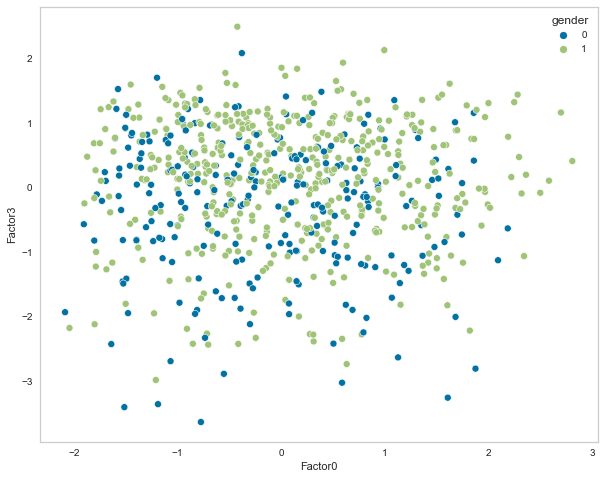

Predict


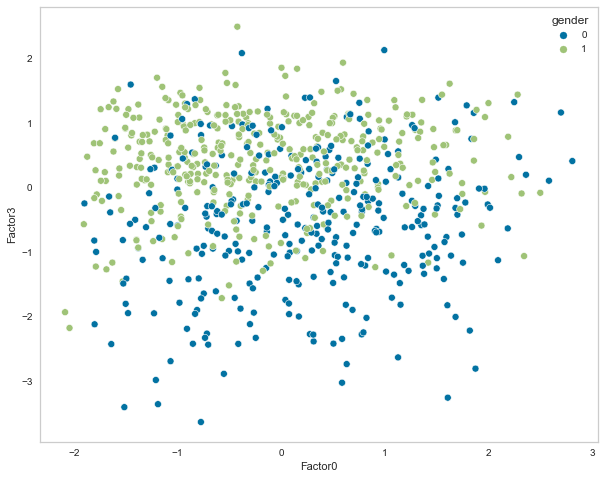

In [38]:
# 모델링
model_kmeans = KMeans(n_clusters=len(np.unique(Y_train)), random_state=123)
model_kmeans.fit(X_train_fas, Y_train)
Y_trpred = model_kmeans.predict(X_train_fas)
Y_tepred = model_kmeans.predict(X_test_fas)

# 성능확인
display(measures_cluster(np.ravel(Y_train), X_train_fas, Y_trpred))
display(measures_cluster(np.ravel(Y_test), X_test_fas, Y_tepred))

# 성능시각화
print('True')
X_test_sub = pd.DataFrame(X_test_fas, columns=colnames).sample(n=2, axis='columns')
df_test = pd.concat([X_test_sub, 
                     Y_test.reset_index().iloc[:,[1]]], axis=1)
plt.figure(figsize = (10,8))
sns.scatterplot(x=df_test.columns[0], y=df_test.columns[1], 
                hue=df_test.columns[2], data=df_test)
plt.grid()
plt.show()
print('Predict')
df_tepred = pd.concat([X_test_sub, 
                       pd.DataFrame(Y_tepred, columns=[Y_test.columns[0]])], 
                       axis=1)
plt.figure(figsize = (10,8))
sns.scatterplot(x=df_tepred.columns[0], y=df_tepred.columns[1], 
                hue=df_tepred.columns[2], data=df_tepred)
plt.grid()
plt.show()

0.0

0.8444195616448924

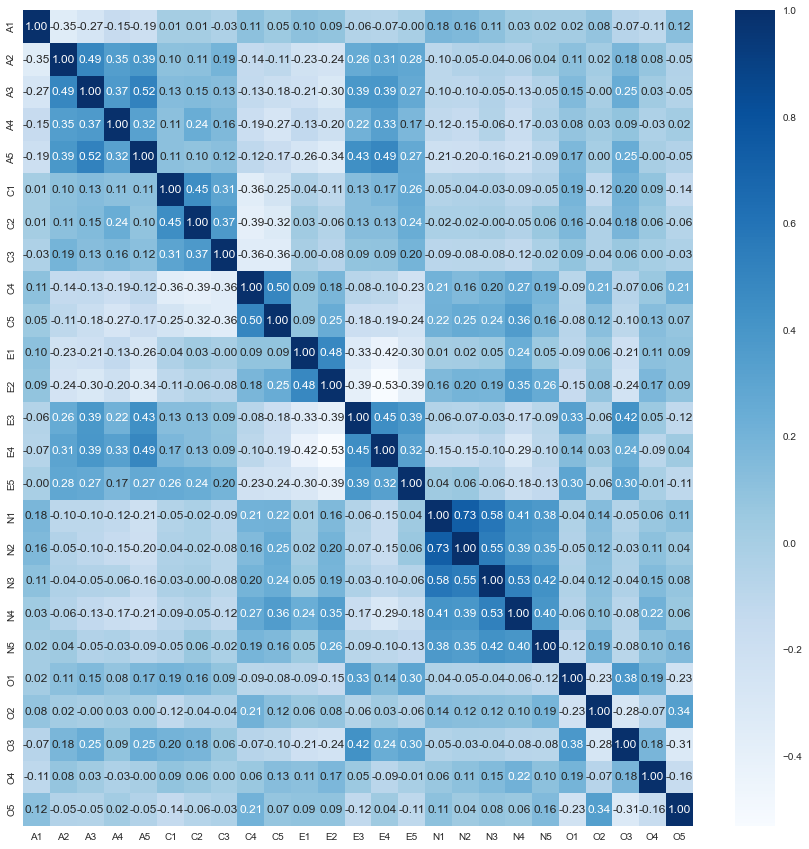

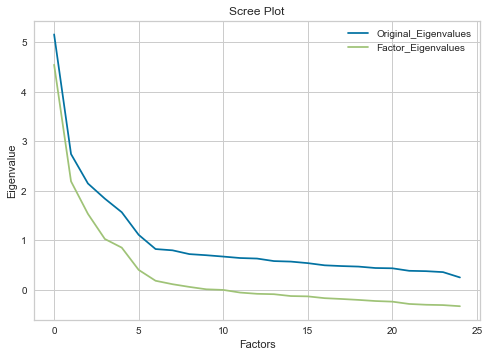

,Factor0,Factor1,Factor2,Factor3,Factor4,Factor5
A1,0.093586,0.033921,0.038239,-0.552072,0.061747,0.200299
A2,0.040214,0.238191,0.136291,0.653532,0.065741,0.001931
A3,-0.034531,0.338140,0.141611,0.572157,0.192530,0.076981
A4,-0.087541,0.211311,0.270229,0.376107,0.041131,0.159681
A5,-0.174701,0.408922,0.087420,0.454451,0.233835,0.127760
C1,0.002248,0.075441,0.538487,0.001540,0.197484,-0.096157
C2,0.053028,-0.002635,0.687095,0.042438,0.200389,0.049499
C3,-0.049461,0.015673,0.547968,0.109766,0.011117,0.015929
C4,0.177919,-0.090171,-0.651196,-0.095430,0.166917,0.295073
C5,0.266002,-0.196608,-0.561214,-0.062713,0.097811,0.055371


,Factor0,Factor1,Factor2,Factor3,Factor4,Factor5
Variance,2.677238,2.596709,2.122585,1.658061,1.213777,1.073464
Proportional Variance,0.107090,0.103868,0.084903,0.066322,0.048551,0.042939
Cumulative Variances,0.107090,0.210958,0.295861,0.362184,0.410735,0.453673


,Communality
A1,0.360087
A2,0.508358
A3,0.505942
A4,0.293986
A5,0.482907
C1,0.343913
C2,0.519325
C3,0.315387
C4,0.587879
C5,0.440939


,Cronbach Alpha
A,0.443753
C,-0.316283
E,-0.655243
N,0.816947
O,-0.176098


,Silhouette,ARI,AMI
Score,0.138439,0.017912,0.00907


,Silhouette,ARI,AMI
Score,0.140363,0.004941,0.00084


True


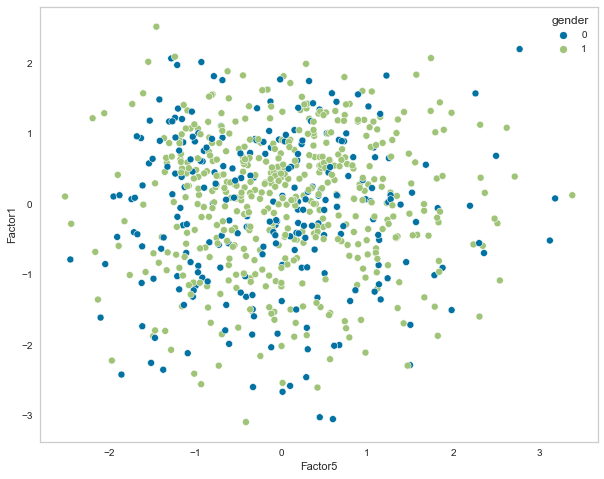

Predict


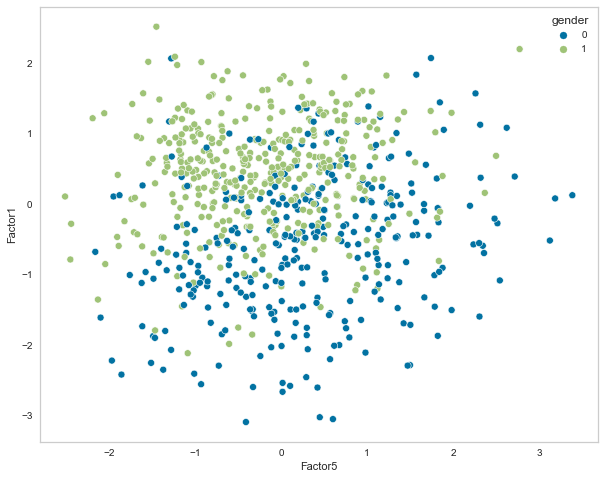

In [39]:
# (0) 데이터 수집
## 예제 데이터 로딩
df = pd.read_csv(os.path.join('.', 'Data', 'PersonalityProject', 'bfi.csv')).iloc[:,1:]
df.drop(['education', 'age'],axis=1,inplace=True)
# df.drop(['gender', 'age'],axis=1,inplace=True)
df.dropna(axis=0, inplace=True)

## 데이터분리 및 스케일링
Y = df.iloc[:,-1:] - 1
X = df[[col for col in df.columns if col not in Y.columns]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=123)
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# (1) 요인분석 가능성 파악(Factorability)
## Bartlett's Test
statistics_bar, p_value = calculate_bartlett_sphericity(X_train)
display(p_value)

## Kalser-Meyer-Olkln (KMO) Test
kmo_each, kmo_all = calculate_kmo(X_train)
display(kmo_all)

## 상관관계
plt.figure(figsize=(15,15))
sns.heatmap(pd.DataFrame(X_train, columns=X.columns).corr(), 
            cmap='Blues', annot=True, fmt='.2f')
plt.show()

# (2) 요인 갯수 선택
model_fa = FactorAnalyzer()
model_fa.fit(X_train)
eigenvalues, factor_eigenvalues = model_fa.get_eigenvalues()
fa_result = pd.DataFrame([eigenvalues, factor_eigenvalues], 
                          index=['Original_Eigenvalues', 'Factor_Eigenvalues']).T

fa_result.plot()
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()

# (3) 요인 추출(Factor Loading)
num_factors = (fa_result.iloc[:,0]>1).sum()
model_fa = FactorAnalyzer(n_factors=num_factors, rotation='varimax')
model_fa.fit(X_train)
colnames = ['Factor' + str(i) for i in range(num_factors)]
fa_loadings = pd.DataFrame(model_fa.loadings_,
                           index=X.columns,
                           columns=colnames)

criteria = pd.Series([0.5]*num_factors, index=colnames)
fa_loadings_light = fa_loadings.style.highlight_between(left=criteria, right=1, axis=1,
                                                        props='color:white; background-color:purple;')
criteria = pd.Series([-1]*num_factors, index=colnames)
fa_loadings_light = fa_loadings_light.highlight_between(left=criteria, right=-0.5, axis=1,
                                                        props='color:white; background-color:purple;')
display(fa_loadings_light)

fa_variance = pd.DataFrame(model_fa.get_factor_variance(), columns=colnames,
                           index=['Variance', 'Proportional Variance', 'Cumulative Variances'])
display(fa_variance)

# (4) 요인 해석 및 레이블링
# (5) 요인 레이블링 검증
## 공통성 추정
fa_communality = pd.DataFrame(model_fa.get_communalities(), 
                              index=X.columns, columns=['Communality'])

criteria = pd.Series([0.5]*len(fa_communality.columns), index=fa_communality.columns)
fa_communality_light = fa_communality.style.highlight_between(left=criteria, right=1, axis=1, 
                                                              props='color:white; background-color:purple;')
display(fa_communality_light)

## 크롬바흐 알파계수 추정
colA = df.columns[[i.startswith('A') for i in df.columns]]
colC = df.columns[[i.startswith('C') for i in df.columns]]
colE = df.columns[[i.startswith('E') for i in df.columns]]
colN = df.columns[[i.startswith('N') for i in df.columns]]
colO = df.columns[[i.startswith('O') for i in df.columns]]

df_cronbach = []
for col_sub in [colA, colC, colE, colN, colO]:
    df_cronbach.append(pg.cronbach_alpha(data=df[col_sub])[0])
display(pd.DataFrame(df_cronbach, columns=['Cronbach Alpha'],
             index=['A', 'C', 'E', 'N', 'O']))

# (6) 요인 활용 추가적 분석 수행 
## 원데이터에서 요인 잠재변수 추출, 데이터분리 및 스케일링
X_train_fa = pd.DataFrame(model_fa.transform(X_train), columns=colnames).copy()
X_test_fa = pd.DataFrame(model_fa.transform(X_test), columns=colnames).copy()
scaler = preprocessing.StandardScaler()
X_train_fas = scaler.fit_transform(X_train_fa)
X_test_fas = scaler.fit_transform(X_test_fa)

## 모델링
model_kmeans = KMeans(n_clusters=len(np.unique(Y_train)), random_state=123)
model_kmeans.fit(X_train_fas, Y_train)
Y_trpred = model_kmeans.predict(X_train_fas)
Y_tepred = model_kmeans.predict(X_test_fas)

## 성능확인
display(measures_cluster(np.ravel(Y_train), X_train_fas, Y_trpred))
display(measures_cluster(np.ravel(Y_test), X_test_fas, Y_tepred))

## 성능시각화
print('True')
X_test_sub = pd.DataFrame(X_test_fas, columns=colnames).sample(n=2, axis='columns')
df_test = pd.concat([X_test_sub, 
                     Y_test.reset_index().iloc[:,[1]]], axis=1)
plt.figure(figsize = (10,8))
sns.scatterplot(x=df_test.columns[0], y=df_test.columns[1], 
                hue=df_test.columns[2], data=df_test)
plt.grid()
plt.show()
print('Predict')
df_tepred = pd.concat([X_test_sub, 
                       pd.DataFrame(Y_tepred, columns=[Y_test.columns[0]])], 
                       axis=1)
plt.figure(figsize = (10,8))
sns.scatterplot(x=df_tepred.columns[0], y=df_tepred.columns[1], 
                hue=df_tepred.columns[2], data=df_tepred)
plt.grid()
plt.show()

In [40]:
# 잠재 요소들의 만족도와 성능을 비즈니스 관점에서 검증이 중요

### `LDA` 알고리즘

In [41]:
# 데이터 확인
pd.DataFrame(X_test, columns=X.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
A1,731.0,-1.397271e-16,1.000685,-1.017064,-1.017064,-0.302185,0.412693,2.557330
A2,731.0,1.139080e-16,1.000685,-3.304129,-0.712586,0.151262,1.015110,1.015110
A3,731.0,-2.591027e-16,1.000685,-2.736886,-0.462543,0.295571,1.053686,1.053686
A4,731.0,-2.941863e-16,1.000685,-2.504240,-0.471746,0.205752,0.883250,0.883250
A5,731.0,2.551539e-17,1.000685,-2.784872,-0.417731,0.371316,0.371316,1.160363
C1,731.0,2.624440e-16,1.000685,-3.106996,-0.526071,0.334237,0.334237,1.194546
C2,731.0,-3.174235e-16,1.000685,-2.662089,-0.346357,0.425554,0.425554,1.197465
C3,731.0,3.233468e-16,1.000685,-2.706506,-0.304496,0.496175,0.496175,1.296845
C4,731.0,-9.629020e-17,1.000685,-1.112894,-1.112894,-0.376672,0.359550,2.568217
C5,731.0,-1.318295e-16,1.000685,-1.411196,-0.790881,-0.170566,1.070065,1.690381


In [42]:
# 모델링
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_train, Y_train)
Y_trpred = model_lda.predict(X_train)
Y_tepred = model_lda.predict(X_test)

,Silhouette,ARI,AMI
Score,0.080227,0.152041,0.077826


,Silhouette,ARI,AMI
Score,0.093386,0.102022,0.04483


True


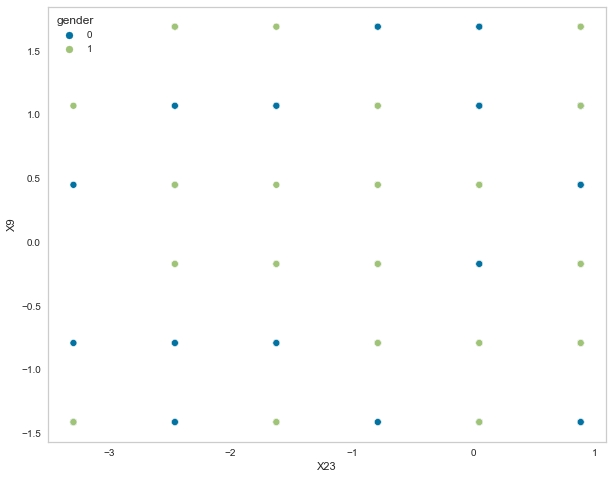

Predict


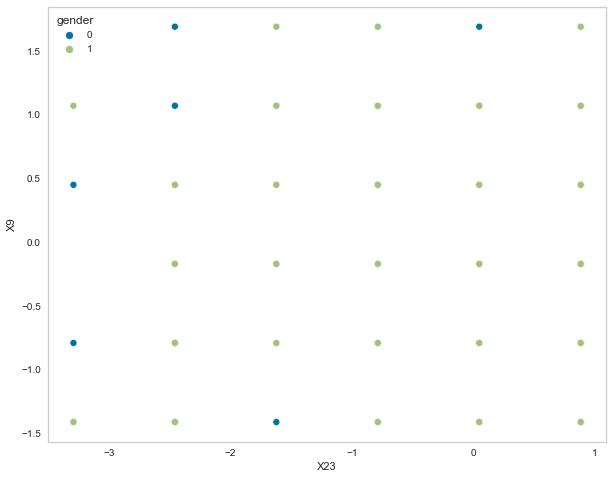

In [43]:
# 성능확인
display(measures_cluster(np.ravel(Y_train), X_train, Y_trpred))
display(measures_cluster(np.ravel(Y_test), X_test, Y_tepred))

# 성능시각화
print('True')
colnames = ['X'+str(i) for i in range(X_test.shape[1])]
X_test_sub = pd.DataFrame(X_test, columns=colnames).sample(n=2, axis='columns')
df_test = pd.concat([X_test_sub, 
                     Y_test.reset_index().iloc[:,[1]]], axis=1)
plt.figure(figsize = (10,8))
sns.scatterplot(x=df_test.columns[0], y=df_test.columns[1], 
                hue=df_test.columns[2], data=df_test)
plt.grid()
plt.show()
print('Predict')
df_tepred = pd.concat([X_test_sub, 
                       pd.DataFrame(Y_tepred, columns=[Y_test.columns[0]])], 
                       axis=1)
plt.figure(figsize = (10,8))
sns.scatterplot(x=df_tepred.columns[0], y=df_tepred.columns[1], 
                hue=df_tepred.columns[2], data=df_tepred)
plt.grid()
plt.show()

### `QDA` 알고리즘

In [44]:
# 데이터 확인
pd.DataFrame(X_test, columns=X.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
A1,731.0,-1.397271e-16,1.000685,-1.017064,-1.017064,-0.302185,0.412693,2.557330
A2,731.0,1.139080e-16,1.000685,-3.304129,-0.712586,0.151262,1.015110,1.015110
A3,731.0,-2.591027e-16,1.000685,-2.736886,-0.462543,0.295571,1.053686,1.053686
A4,731.0,-2.941863e-16,1.000685,-2.504240,-0.471746,0.205752,0.883250,0.883250
A5,731.0,2.551539e-17,1.000685,-2.784872,-0.417731,0.371316,0.371316,1.160363
C1,731.0,2.624440e-16,1.000685,-3.106996,-0.526071,0.334237,0.334237,1.194546
C2,731.0,-3.174235e-16,1.000685,-2.662089,-0.346357,0.425554,0.425554,1.197465
C3,731.0,3.233468e-16,1.000685,-2.706506,-0.304496,0.496175,0.496175,1.296845
C4,731.0,-9.629020e-17,1.000685,-1.112894,-1.112894,-0.376672,0.359550,2.568217
C5,731.0,-1.318295e-16,1.000685,-1.411196,-0.790881,-0.170566,1.070065,1.690381


In [45]:
# 모델링
model_qda = QuadraticDiscriminantAnalysis()
model_qda.fit(X_train, Y_train)
Y_trpred = model_qda.predict(X_train)
Y_tepred = model_qda.predict(X_test)

,Silhouette,ARI,AMI
Score,0.061112,0.246007,0.145501


,Silhouette,ARI,AMI
Score,0.066736,0.094483,0.038647


True


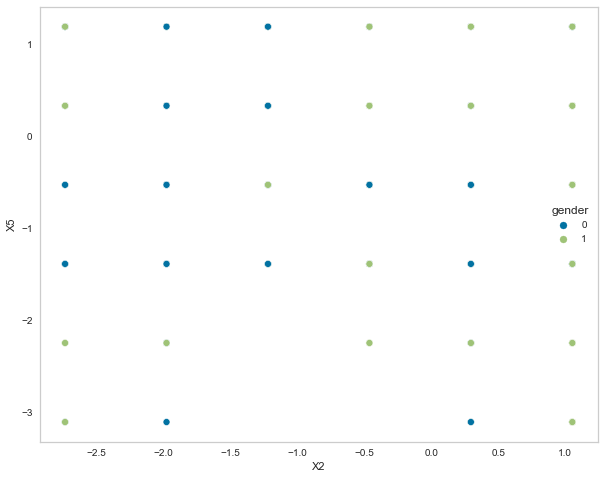

Predict


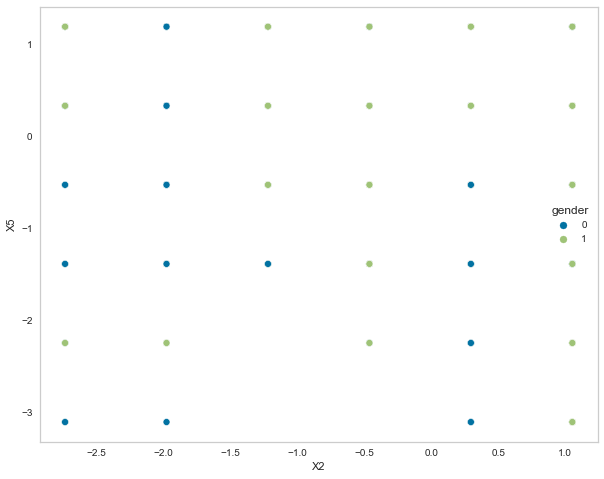

In [46]:
# 성능확인
display(measures_cluster(np.ravel(Y_train), X_train, Y_trpred))
display(measures_cluster(np.ravel(Y_test), X_test, Y_tepred))

# 성능시각화
print('True')
colnames = ['X'+str(i) for i in range(X_test.shape[1])]
X_test_sub = pd.DataFrame(X_test, columns=colnames).sample(n=2, axis='columns')
df_test = pd.concat([X_test_sub, 
                     Y_test.reset_index().iloc[:,[1]]], axis=1)
plt.figure(figsize = (10,8))
sns.scatterplot(x=df_test.columns[0], y=df_test.columns[1], 
                hue=df_test.columns[2], data=df_test)
plt.grid()
plt.show()
print('Predict')
df_tepred = pd.concat([X_test_sub, 
                       pd.DataFrame(Y_tepred, columns=[Y_test.columns[0]])], 
                       axis=1)
plt.figure(figsize = (10,8))
sns.scatterplot(x=df_tepred.columns[0], y=df_tepred.columns[1], 
                hue=df_tepred.columns[2], data=df_tepred)
plt.grid()
plt.show()

- `LDA` vs `QDA`

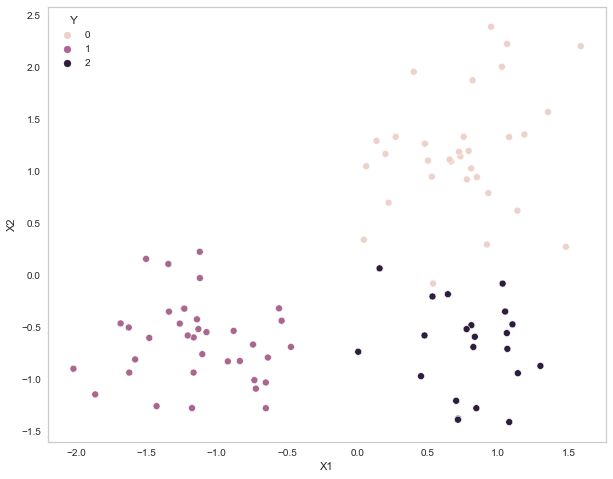

In [47]:
# 예제 데이터 로딩
X, Y = make_blobs(n_samples=300, centers=[[1,1], [-1,-1], [1,-1]], 
                  cluster_std=0.5, random_state=123)

# 데이터분리 및 스케일링
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=123)
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Test 데이터 시각화
df_test = pd.concat([pd.DataFrame(X_test, columns=X_label), 
                     pd.DataFrame(Y_test, columns=Y_label)], axis=1)
plt.figure(figsize = (10,8))
sns.scatterplot(x='X1', y='X2', hue='Y', data=df_test)
plt.grid()
plt.show()

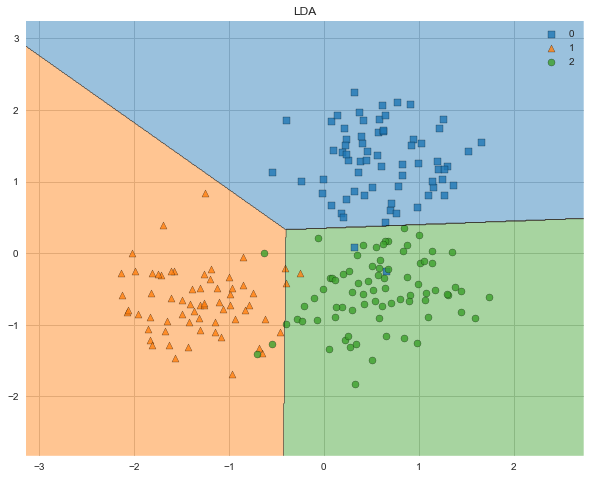

,Silhouette,ARI,AMI
Score,0.527748,0.900352,0.865289


,Silhouette,ARI,AMI
Score,0.600871,0.888061,0.878368


In [48]:
# 모델링(LDA)
model_lda = LinearDiscriminantAnalysis()
model_lda.fit(X_train, Y_train)
Y_trpred = model_lda.predict(X_train)
Y_tepred = model_lda.predict(X_test)

# 학습결과
plt.figure(figsize=(10,8))
plot_decision_regions(X=X_train, y=Y_train.astype(np.int_), clf=model_lda)
plt.title('LDA')
plt.show()

# 성능확인
display(measures_cluster(np.ravel(Y_train), X_train, Y_trpred))
display(measures_cluster(np.ravel(Y_test), X_test, Y_tepred))

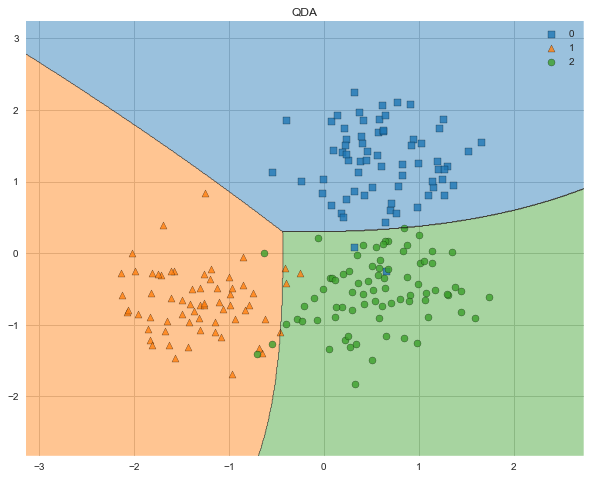

,Silhouette,ARI,AMI
Score,0.527004,0.872858,0.827822


,Silhouette,ARI,AMI
Score,0.603688,0.914413,0.899733


In [49]:
# 모델링(QDA)
model_qda = QuadraticDiscriminantAnalysis()
model_qda.fit(X_train, Y_train)
Y_trpred = model_qda.predict(X_train)
Y_tepred = model_qda.predict(X_test)

# 학습결과
plt.figure(figsize=(10,8))
plot_decision_regions(X=X_train, y=Y_train.astype(np.int_), clf=model_qda)
plt.title('QDA')
plt.show()

# 성능확인
display(measures_cluster(np.ravel(Y_train), X_train, Y_trpred))
display(measures_cluster(np.ravel(Y_test), X_test, Y_tepred))

### `NMF` 알고리즘

In [50]:
# 예제 데이터 로딩
# 아래 둘 중 하나의 방법으로 데이터 로딩
# df = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/psych/bfi.csv').iloc[:,1:]
df = pd.read_csv(os.path.join('.', 'Data', 'PersonalityProject', 'bfi.csv')).iloc[:,1:]
df.drop(['education', 'age'],axis=1,inplace=True)
# df.drop(['gender', 'age'],axis=1,inplace=True)
df.dropna(axis=0, inplace=True)

# 데이터분리 및 스케일링
Y = df.iloc[:,-1:] - 1
X = df[[col for col in df.columns if col not in Y.columns]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, random_state=123)

In [51]:
# 데이터 확인
# NMF에서는 데이터가 음수값이 없어야 하기 때문에 스케일링 미시행
pd.DataFrame(X_test, columns=X.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
A1,731.0,2.422709,1.399796,1.0,1.0,2.0,3.0,6.0
A2,731.0,4.824897,1.158404,1.0,4.0,5.0,6.0,6.0
A3,731.0,4.610123,1.319965,1.0,4.0,5.0,6.0,6.0
A4,731.0,4.696306,1.477030,1.0,4.0,5.0,6.0,6.0
A5,731.0,4.529412,1.268219,1.0,4.0,5.0,5.0,6.0
C1,731.0,4.611491,1.163170,1.0,4.0,5.0,5.0,6.0
C2,731.0,4.448700,1.296373,1.0,4.0,5.0,5.0,6.0
C3,731.0,4.380301,1.249809,1.0,4.0,5.0,5.0,6.0
C4,731.0,2.511628,1.359216,1.0,1.0,2.0,3.0,6.0
C5,731.0,3.274966,1.613187,1.0,2.0,3.0,5.0,6.0


In [52]:
# 모델링
n_factor = 5
model_nmf = NMF(n_components=n_factor, random_state=123)
model_nmf.fit(X_train)
X_train_nmf = model_nmf.transform(X_train)
X_test_nmf = model_nmf.transform(X_test)

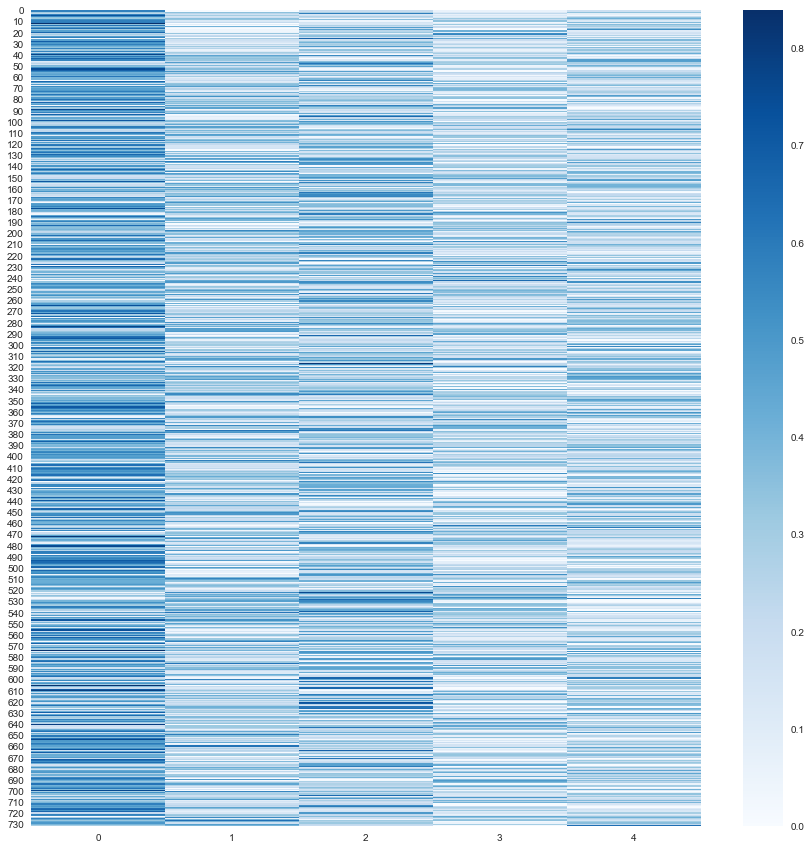

In [53]:
# Test 가중치 행렬 W 시각화
plt.figure(figsize=(15,15))
sns.heatmap(X_test_nmf, cmap='Blues', annot=False, fmt='.2f')
plt.show()

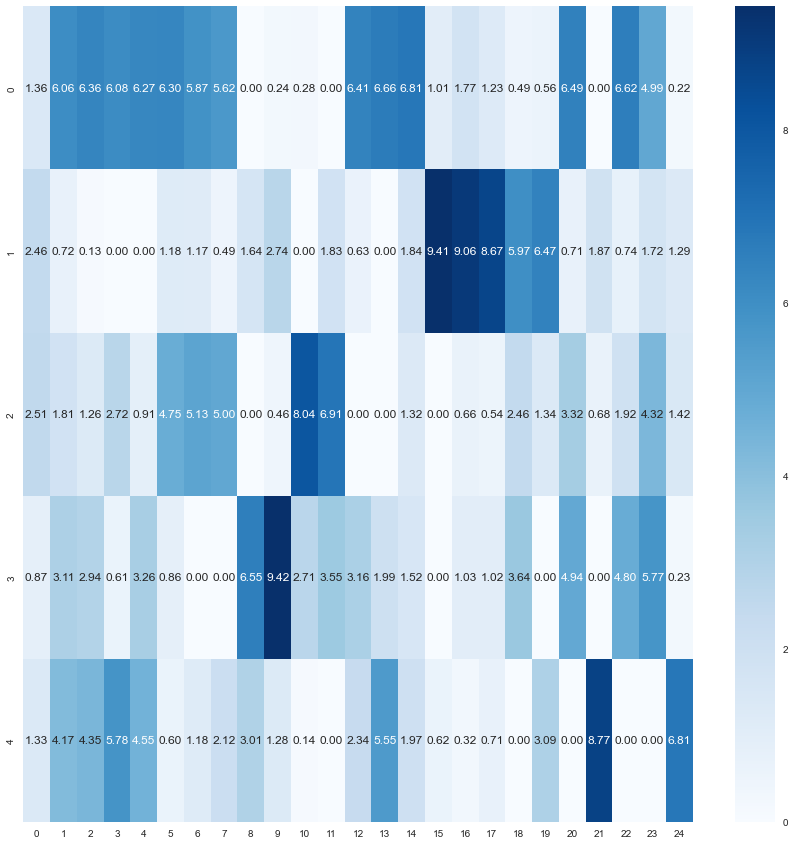

In [54]:
# 특성 행렬 H 시각화
plt.figure(figsize=(15,15))
sns.heatmap(model_nmf.components_, cmap='Blues', annot=True, fmt='.2f')
plt.show()

,Silhouette,ARI,AMI
Score,0.245565,0.014386,0.010157


,Silhouette,ARI,AMI
Score,0.257013,0.003058,0.000395


True


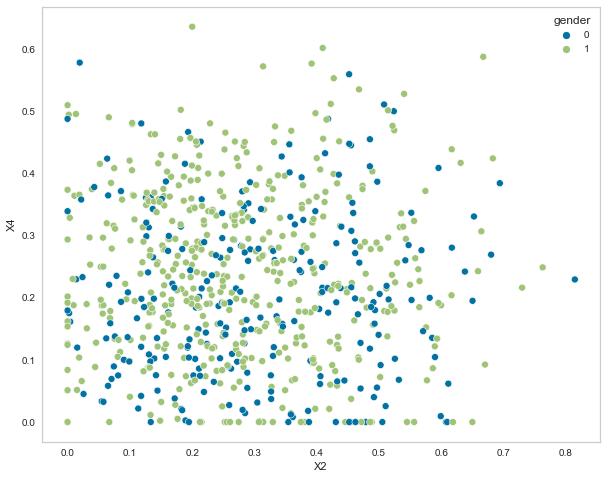

Predict


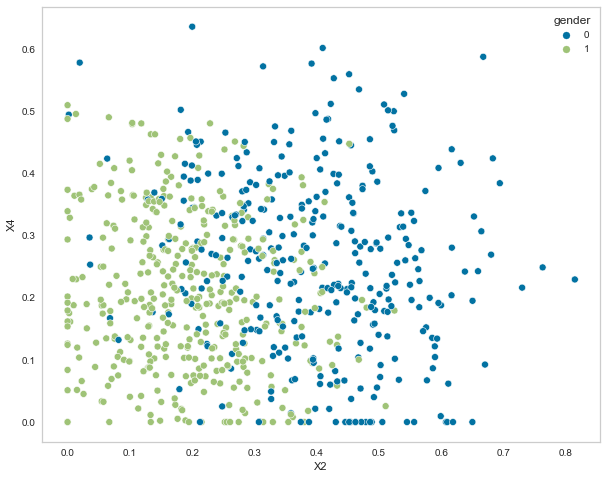

In [55]:
# 모델링
model_kmeans = KMeans(n_clusters=len(np.unique(Y_train)), random_state=123)
model_kmeans.fit(X_train_nmf, Y_train)
Y_trpred = model_kmeans.predict(X_train_nmf)
Y_tepred = model_kmeans.predict(X_test_nmf)

# 성능확인
display(measures_cluster(np.ravel(Y_train), X_train_nmf, Y_trpred))
display(measures_cluster(np.ravel(Y_test), X_test_nmf, Y_tepred))

# 성능시각화
print('True')
colnames = ['X'+str(i) for i in range(X_test_nmf.shape[1])]
X_test_sub = pd.DataFrame(X_test_nmf, columns=colnames).sample(n=2, axis='columns')
df_test = pd.concat([X_test_sub, 
                     Y_test.reset_index().iloc[:,[1]]], axis=1)
plt.figure(figsize = (10,8))
sns.scatterplot(x=df_test.columns[0], y=df_test.columns[1], 
                hue=df_test.columns[2], data=df_test)
plt.grid()
plt.show()
print('Predict')
df_tepred = pd.concat([X_test_sub, 
                       pd.DataFrame(Y_tepred, columns=[Y_test.columns[0]])], 
                       axis=1)
plt.figure(figsize = (10,8))
sns.scatterplot(x=df_tepred.columns[0], y=df_tepred.columns[1], 
                hue=df_tepred.columns[2], data=df_tepred)
plt.grid()
plt.show()

In [56]:
# 잠재 요소들의 만족도와 성능을 비즈니스 관점에서 검증이 중요

---

- `Target Recommendation`

In [57]:
# 예제 데이터 로딩
# NMF에서는 데이터가 음수값이 없어야 하기 때문에 스케일링 미시행
# 데이터 확인
df = pd.read_csv(os.path.join('.', 'Data', 'Movies', 'Movie_Rating.csv'))
df

,user_id,rating,title
0,0,5,Star Wars (1977)
1,290,5,Star Wars (1977)
2,79,4,Star Wars (1977)
3,2,5,Star Wars (1977)
4,8,5,Star Wars (1977)
...,...,...,...
99998,840,4,Mamma Roma (1962)
99999,655,3,"Eighth Day, The (1996)"
100000,655,3,Girls Town (1996)
100001,655,3,"Silence of the Palace, The (Saimt el Qusur) (1..."


In [58]:
# 데이터 행렬 생성
df_distmat = df.pivot_table(index='user_id',columns='title',values='rating').fillna(0)
df_distmat

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
# 모델링
n_factor = 50
model_nmf = NMF(n_components=n_factor, random_state=123)
model_nmf.fit(df_distmat)
df_W = model_nmf.transform(df_distmat)

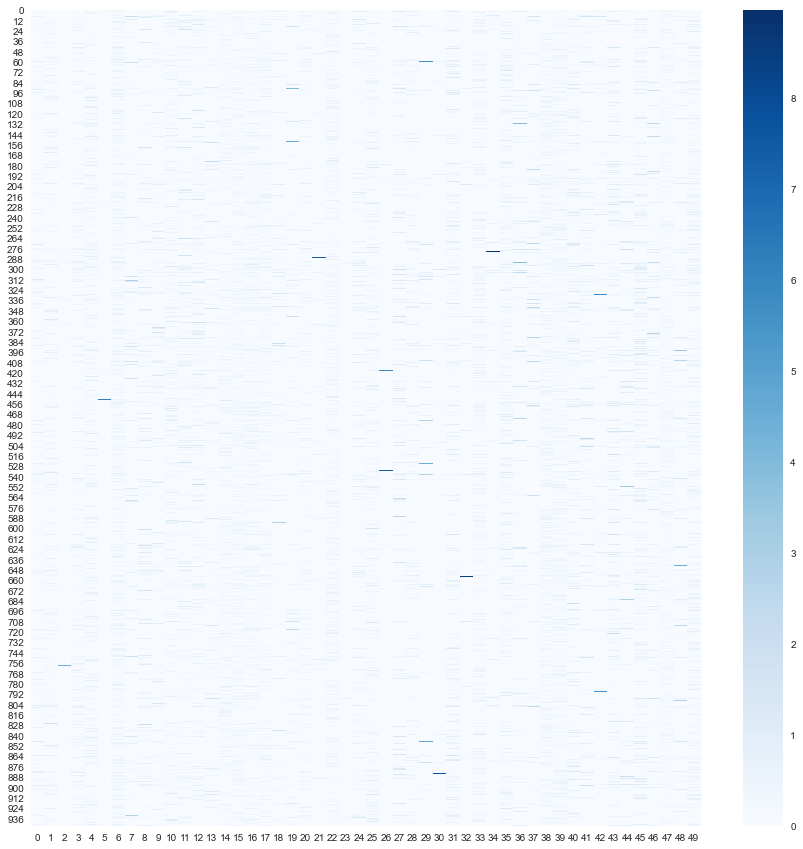

In [60]:
# Test 가중치 행렬 W 시각화
plt.figure(figsize=(15,15))
sns.heatmap(df_W, cmap='Blues', annot=False, fmt='.2f')
plt.show()

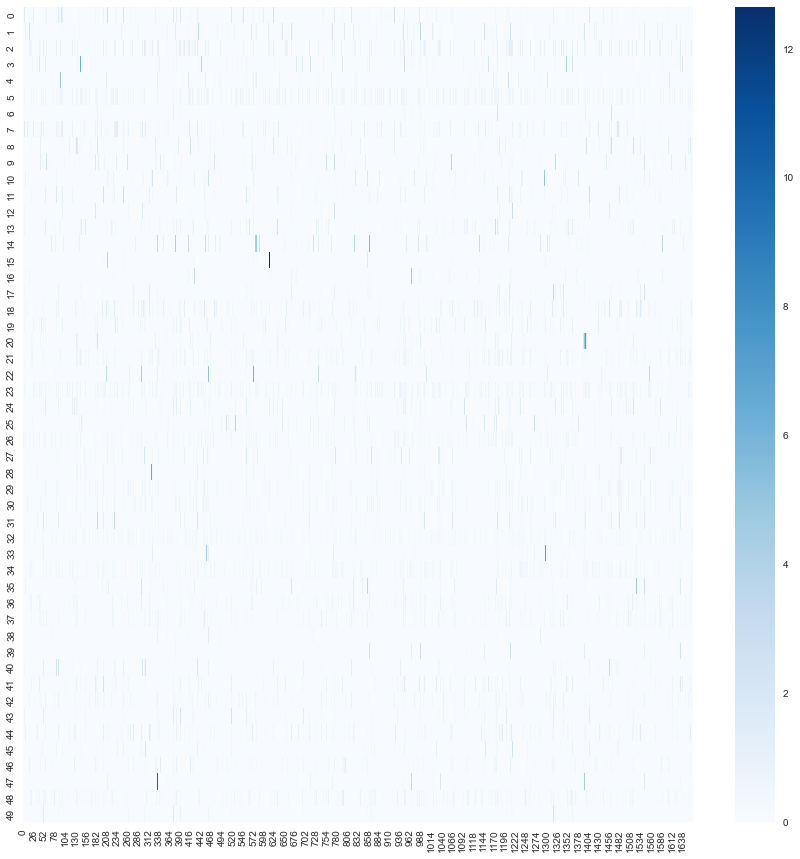

In [61]:
# 특성 행렬 H 시각화
df_H = model_nmf.components_
plt.figure(figsize=(15,15))
sns.heatmap(df_H, cmap='Blues', annot=False, fmt='.2f')
plt.show()

In [62]:
# 고객 타겟 추천 마케팅
user_id = 1
movie_id = 3

print('Target Customer Characteristic: \n', df_W[user_id, :].round(2))
print('Recommending Movie: \n', df_H[:, movie_id].round(2))
display(df_distmat.iloc[[user_id], :])
print('Predicted Rating: ', sum(df_W[user_id, :] * df_H[:, movie_id]).round(2))

Target Customer Characteristic: 
 [0.17 0.   0.   0.   0.   0.   0.46 0.   0.15 0.   0.84 0.03 0.42 0.
 0.   0.16 0.12 0.24 0.59 0.   0.32 0.07 0.   0.   0.87 0.   0.   1.07
 0.5  0.   0.   1.01 0.   0.   0.29 0.   0.74 0.   0.   0.18 0.01 0.08
 0.   0.61 0.39 0.   0.21 0.39 0.   0.  ]
Recommending Movie: 
 [1.58 0.   0.   0.   0.   0.58 0.   1.66 0.   0.   0.   0.01 0.43 0.57
 0.   0.   0.   0.25 0.34 0.5  0.   0.16 0.1  0.53 0.   0.   0.19 0.
 0.19 0.16 0.   0.   0.23 0.   0.14 0.12 0.   0.   0.   0.   0.27 0.
 0.   0.75 0.21 0.06 0.   0.   0.06 0.08]


title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0


Predicted Rating:  1.4


In [63]:
# 고객 타겟 추천 마케팅
pred_rating = []
for movie_id, col in enumerate(df_distmat.columns):
    pred_rating.append(sum(df_W[user_id, :] * df_H[:, movie_id]).round(2))
    
pd.DataFrame(pred_rating, 
             index=df_distmat.iloc[[user_id], :].columns, 
             columns=['Pred_'+str(df_distmat.iloc[[user_id], :].index[0])]).T

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
Pred_1,0.02,0.18,0.15,1.4,0.31,1.27,0.79,4.39,0.0,0.35,...,0.0,0.07,0.02,2.0,1.12,0.55,0.74,0.0,0.27,0.0


- `고객 잠재 요인 추가 반영시`

In [64]:
# 모델링
n_factor = 200
model_nmf = NMF(n_components=n_factor, random_state=123)
model_nmf.fit(df_distmat)
df_W = model_nmf.transform(df_distmat)
df_H = model_nmf.components_
display(df_distmat.iloc[[user_id], :])

# 고객 타겟 추천 마케팅
pred_rating = []
for movie_id, col in enumerate(df_distmat.columns):
    pred_rating.append(sum(df_W[user_id, :] * df_H[:, movie_id]).round(2))

pd.DataFrame(pred_rating, 
             index=df_distmat.iloc[[user_id], :].columns, 
             columns=['Pred_'+str(df_distmat.iloc[[user_id], :].index[0])]).T

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,2.0,5.0,0.0,0.0,3.0,4.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0,4.0,0.0


title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
Pred_1,0.0,0.0,2.03,4.95,0.0,0.18,2.98,4.01,0.0,0.01,...,0.0,0.0,0.0,5.04,3.1,0.0,0.0,0.0,4.01,0.0
